### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

## Content for Regression Dataset

### The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 

In [37]:
df = pd.read_csv('C:/Users/rm318/OneDrive/Desktop/ML Project/Life Expectancy Data.csv')

In [38]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [40]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [41]:
org_cols = list(df.columns)
nw_cols = []
for col in org_cols:
    nw_cols.append(col.strip().replace(' ', '_').lower())
df.columns = nw_cols
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [42]:
df.rename(columns={'thinness__1-19_years':'thinness_10-19_years'},inplace=True)

In [43]:
df.describe().iloc[:,1:]

life_expectancy  adult_mortality  infant_deaths      alcohol  \
count      2928.000000      2928.000000    2938.000000  2744.000000   
mean         69.224932       164.796448      30.303948     4.602861   
std           9.523867       124.292079     117.926501     4.052413   
min          36.300000         1.000000       0.000000     0.010000   
25%          63.100000        74.000000       0.000000     0.877500   
50%          72.100000       144.000000       3.000000     3.755000   
75%          75.700000       228.000000      22.000000     7.702500   
max          89.000000       723.000000    1800.000000    17.870000   

       percentage_expenditure  hepatitis_b        measles          bmi  \
count             2938.000000  2385.000000    2938.000000  2904.000000   
mean               738.251295    80.940461    2419.592240    38.321247   
std               1987.914858    25.070016   11467.272489    20.044034   
min                  0.000000     1.000000       0.000000     1.000000   
25%                  4.685343    77.000000       0.000000    19.300000   
50%                 64.912906    92.000000      17.000000    43.500000   
75%                441.534144    97.000000     360.250000    56.200000   
max              19479.911610    99.000000  212183.000000    87.300000   

       under-five_deaths        polio  total_expenditure   diphtheria  \
count        2938.000000  2919.000000         2712.00000  2919.000000   
mean           42.035739    82.550188            5.93819    82.324084   
std           160.445548    23.428046            2.49832    23.716912   
min             0.000000     3.000000            0.37000     2.000000   
25%             0.000000    78.000000            4.26000    78.000000   
50%             4.000000    93.000000            5.75500    93.000000   
75%            28.000000    97.000000            7.49250    97.000000   
max          2500.000000    99.000000           17.60000    99.000000   

          hiv/aids            gdp    population  thinness_10-19_years  \
count  2938.000000    2490.000000  2.286000e+03           2904.000000   
mean      1.742103    7483.158469  1.275338e+07              4.839704   
std       5.077785   14270.169342  6.101210e+07              4.420195   
min       0.100000       1.681350  3.400000e+01              0.100000   
25%       0.100000     463.935626  1.957932e+05              1.600000   
50%       0.100000    1766.947595  1.386542e+06              3.300000   
75%       0.800000    5910.806335  7.420359e+06              7.200000   
max      50.600000  119172.741800  1.293859e+09             27.700000   

       thinness_5-9_years  income_composition_of_resources    schooling  
count         2904.000000                      2771.000000  2775.000000  
mean             4.870317                         0.627551    11.992793  
std              4.508882                         0.210904     3.358920  
min              0.100000                         0.000000     0.000000  
25%              1.500000                         0.493000    10.100000  
50%              3.300000                         0.677000    12.300000  
75%              7.200000                         0.779000    14.300000  
max             28.600000                         0.948000    20.700000

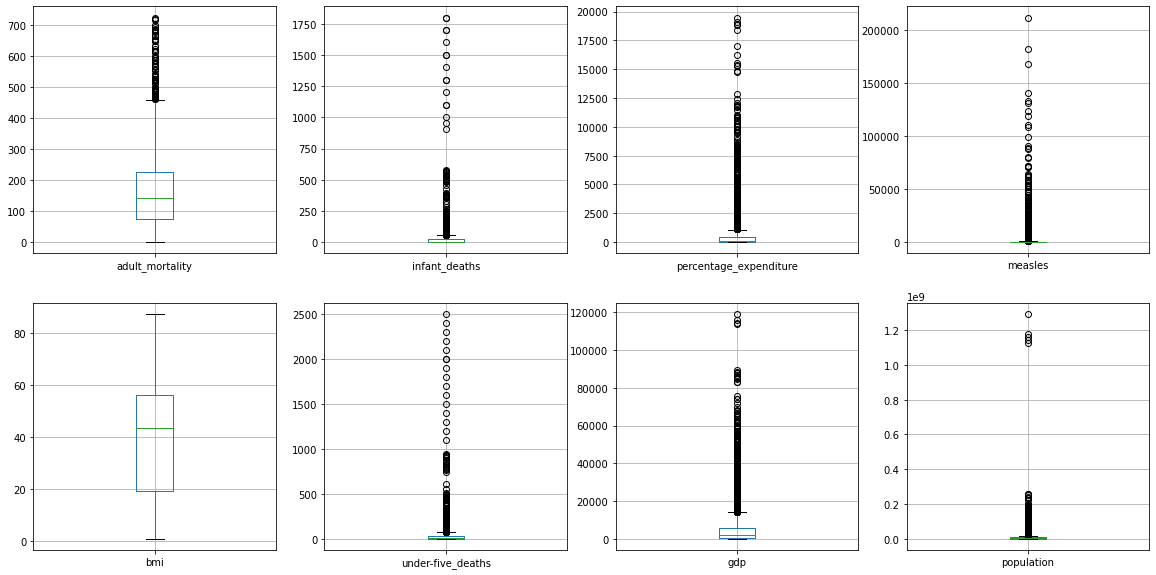

In [44]:
#Adult Mortality Rate can't have a value of 1
#Infant_deaths can't have a value of 1800, it's an outlier
#BMI of 1 or 87 is not possible.It means either the population is too much under-weight or too obese
#Minimum value of population of a country can't be 34
#Plotting Box-plots of these columns having outliers
plt.figure(figsize=(20,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'percentage_expenditure','measles','bmi', 'under-five_deaths', 'gdp', 'population'],start=1):
    plt.subplot(2, 4, i)
    df.boxplot(col)

In [45]:
df[['country', 'gdp','population']].groupby('country').mean()

gdp    population
country                                                      
Afghanistan                          340.015425  9.972260e+06
Albania                             2119.726679  6.969116e+05
Algeria                             2847.853392  2.164983e+07
Angola                              1975.143045  1.014710e+07
Antigua and Barbuda                 9759.305728           NaN
...                                         ...           ...
Venezuela (Bolivarian Republic of)          NaN           NaN
Viet Nam                                    NaN           NaN
Yemen                                       NaN           NaN
Zambia                               811.811841  6.260246e+06
Zimbabwe                             410.980194  8.021343e+06

[193 rows x 2 columns]

In [46]:
df['gdp'] = df['gdp'].replace(' ', np.nan)
df['population'] = df['population'].replace(' ', np.nan)
df = df.dropna(how='any', subset=['gdp', 'population'])
df

country  year      status  life_expectancy  adult_mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  polio  total_expenditure  diphtheria  hiv/aids         gdp  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358879   

      population  thinness_10-19_years  thinness_5-9_years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      income_composition_of_resources  schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937         

In [47]:
df.shape

(2264, 22)

In [48]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      2
adult_mortality                      2
infant_deaths                        0
alcohol                            146
percentage_expenditure               0
hepatitis_b                        473
measles                              0
bmi                                 24
under-five_deaths                    0
polio                               11
total_expenditure                  142
diphtheria                          11
hiv/aids                             0
gdp                                  0
population                           0
thinness_10-19_years                24
thinness_5-9_years                  24
income_composition_of_resources      1
schooling                            0
dtype: int64

In [49]:
df.isnull().sum()


country                              0
year                                 0
status                               0
life_expectancy                      2
adult_mortality                      2
infant_deaths                        0
alcohol                            146
percentage_expenditure               0
hepatitis_b                        473
measles                              0
bmi                                 24
under-five_deaths                    0
polio                               11
total_expenditure                  142
diphtheria                          11
hiv/aids                             0
gdp                                  0
population                           0
thinness_10-19_years                24
thinness_5-9_years                  24
income_composition_of_resources      1
schooling                            0
dtype: int64

In [50]:
df['gdp'] = df.groupby(['country'])['gdp'].transform(lambda x: x.fillna(x.median()))
df['population'] = df.groupby(['country'])['population'].transform(lambda x: x.fillna(x.median()))
df['alcohol'] = df.groupby(['country'])['alcohol'].transform(lambda x: x.fillna(x.median()))
df['life_expectancy'] = df.groupby(['country'])['life_expectancy'].transform(lambda x: x.fillna(x.median()))
df['adult_mortality'] = df.groupby(['country'])['adult_mortality'].transform(lambda x: x.fillna(x.median()))
df['hepatitis_b'] = df.groupby(['country'])['hepatitis_b'].transform(lambda x: x.fillna(x.median()))
df['bmi'] = df.groupby(['country'])['bmi'].transform(lambda x: x.fillna(x.median()))
df['polio'] = df.groupby(['country'])['polio'].transform(lambda x: x.fillna(x.median()))
df['total_expenditure'] = df.groupby(['country'])['total_expenditure'].transform(lambda x: x.fillna(x.median()))
df['diphtheria'] = df.groupby(['country'])['diphtheria'].transform(lambda x: x.fillna(x.median()))
df['thinness_10-19_years'] = df.groupby(['country'])['thinness_10-19_years'].transform(lambda x: x.fillna(x.median()))
df['thinness_5-9_years'] = df.groupby(['country'])['thinness_5-9_years'].transform(lambda x: x.fillna(x.median()))
df['income_composition_of_resources'] = df.groupby(['country'])['income_composition_of_resources'].transform(lambda x: x.fillna(x.median()))
df['schooling'] = df.groupby(['country'])['schooling'].transform(lambda x: x.fillna(x.median()))


In [51]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      2
adult_mortality                      2
infant_deaths                        0
alcohol                              9
percentage_expenditure               0
hepatitis_b                        128
measles                              0
bmi                                 24
under-five_deaths                    0
polio                                0
total_expenditure                    0
diphtheria                           0
hiv/aids                             0
gdp                                  0
population                           0
thinness_10-19_years                24
thinness_5-9_years                  24
income_composition_of_resources      1
schooling                            0
dtype: int64

In [52]:
df.shape

(2264, 22)

In [53]:
df.describe().iloc[:,1:]

life_expectancy  adult_mortality  infant_deaths      alcohol  \
count      2262.000000      2262.000000    2264.000000  2255.000000   
mean         68.746331       169.634836      34.228799     4.724627   
std           9.818526       128.855041     132.333898     4.042873   
min          36.300000         1.000000       0.000000     0.010000   
25%          62.300000        72.000000       0.000000     1.000000   
50%          71.400000       146.000000       3.000000     4.090000   
75%          75.400000       235.000000      23.000000     7.555000   
max          89.000000       723.000000    1800.000000    17.870000   

       percentage_expenditure  hepatitis_b      measles          bmi  \
count             2264.000000  2136.000000    2264.0000  2240.000000   
mean               839.385437    78.022940    2570.6197    37.483616   
std               2173.666169    25.392215   11601.7250    19.888726   
min                  0.000000     2.000000       0.0000     1.400000   
25%                 22.166537    72.000000       0.0000    18.775000   
50%                 97.600031    88.000000      18.0000    42.000000   
75%                501.950334    95.000000     441.0000    55.800000   
max              19479.911610    99.000000  212183.0000    83.300000   

       under-five_deaths        polio  total_expenditure   diphtheria  \
count        2264.000000  2264.000000        2264.000000  2264.000000   
mean           47.570230    81.293286           6.009481    81.404594   
std           179.890433    23.848763           2.360899    23.893922   
min             0.000000     3.000000           0.370000     2.000000   
25%             1.000000    75.000000           4.387500    77.000000   
50%             4.000000    92.000000           5.890000    92.000000   
75%            32.000000    96.000000           7.680000    96.000000   
max          2500.000000    99.000000          16.610000    99.000000   

          hiv/aids            gdp    population  thinness_10-19_years  \
count  2264.000000    2264.000000  2.264000e+03           2240.000000   
mean      2.061793    6628.839008  1.280247e+07              4.870804   
std       5.670784   13536.349181  6.129943e+07              4.679382   
min       0.100000       1.681350  3.400000e+01              0.100000   
25%       0.100000     435.661704  1.951538e+05              1.500000   
50%       0.100000    1521.980960  1.374823e+06              2.900000   
75%       1.100000    5178.561948  7.391118e+06              7.300000   
max      50.600000  119172.741800  1.293859e+09             27.700000   

       thinness_5-9_years  income_composition_of_resources    schooling  
count         2240.000000                      2263.000000  2264.000000  
mean             4.932455                         0.620958    11.911837  
std              4.777398                         0.209099     3.383100  
min              0.100000                         0.000000     0.000000  
25%              1.500000                         0.481500     9.900000  
50%              3.000000                         0.666000    12.100000  
75%              7.400000                         0.769000    14.300000  
max             28.600000                         0.948000    20.700000

In [54]:
df

country  year      status  life_expectancy  adult_mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  polio  total_expenditure  diphtheria  hiv/aids         gdp  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358879   

      population  thinness_10-19_years  thinness_5-9_years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      income_composition_of_resources  schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937         

In [55]:
df['life_expectancy'] = df['life_expectancy'].replace(' ', np.nan)
df['adult_mortality'] = df['adult_mortality'].replace(' ', np.nan)
df['alcohol'] = df['alcohol'].replace(' ', np.nan)
df['hepatitis_b'] = df['hepatitis_b'].replace(' ', np.nan)
df['bmi'] = df['bmi'].replace(' ', np.nan)
df['thinness_10-19_years'] = df['thinness_10-19_years'].replace(' ', np.nan)
df['thinness_5-9_years'] = df['thinness_5-9_years'].replace(' ', np.nan)
df['income_composition_of_resources'] = df['income_composition_of_resources'].replace(' ', np.nan)
df = df.dropna()
df

country  year      status  life_expectancy  adult_mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  polio  total_expenditure  diphtheria  hiv/aids         gdp  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358879   

      population  thinness_10-19_years  thinness_5-9_years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      income_composition_of_resources  schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937         

In [56]:
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_10-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [57]:
#plt.figure(figsize=(20,10))
#for i, col in enumerate(['adult_mortality', 'infant_deaths', 'percentage_expenditure','measles','bmi', 'under-five_deaths', 'gdp', 'population'],start=1):
    #plt.subplot(2, 4, i)
    #df.boxplot(col)

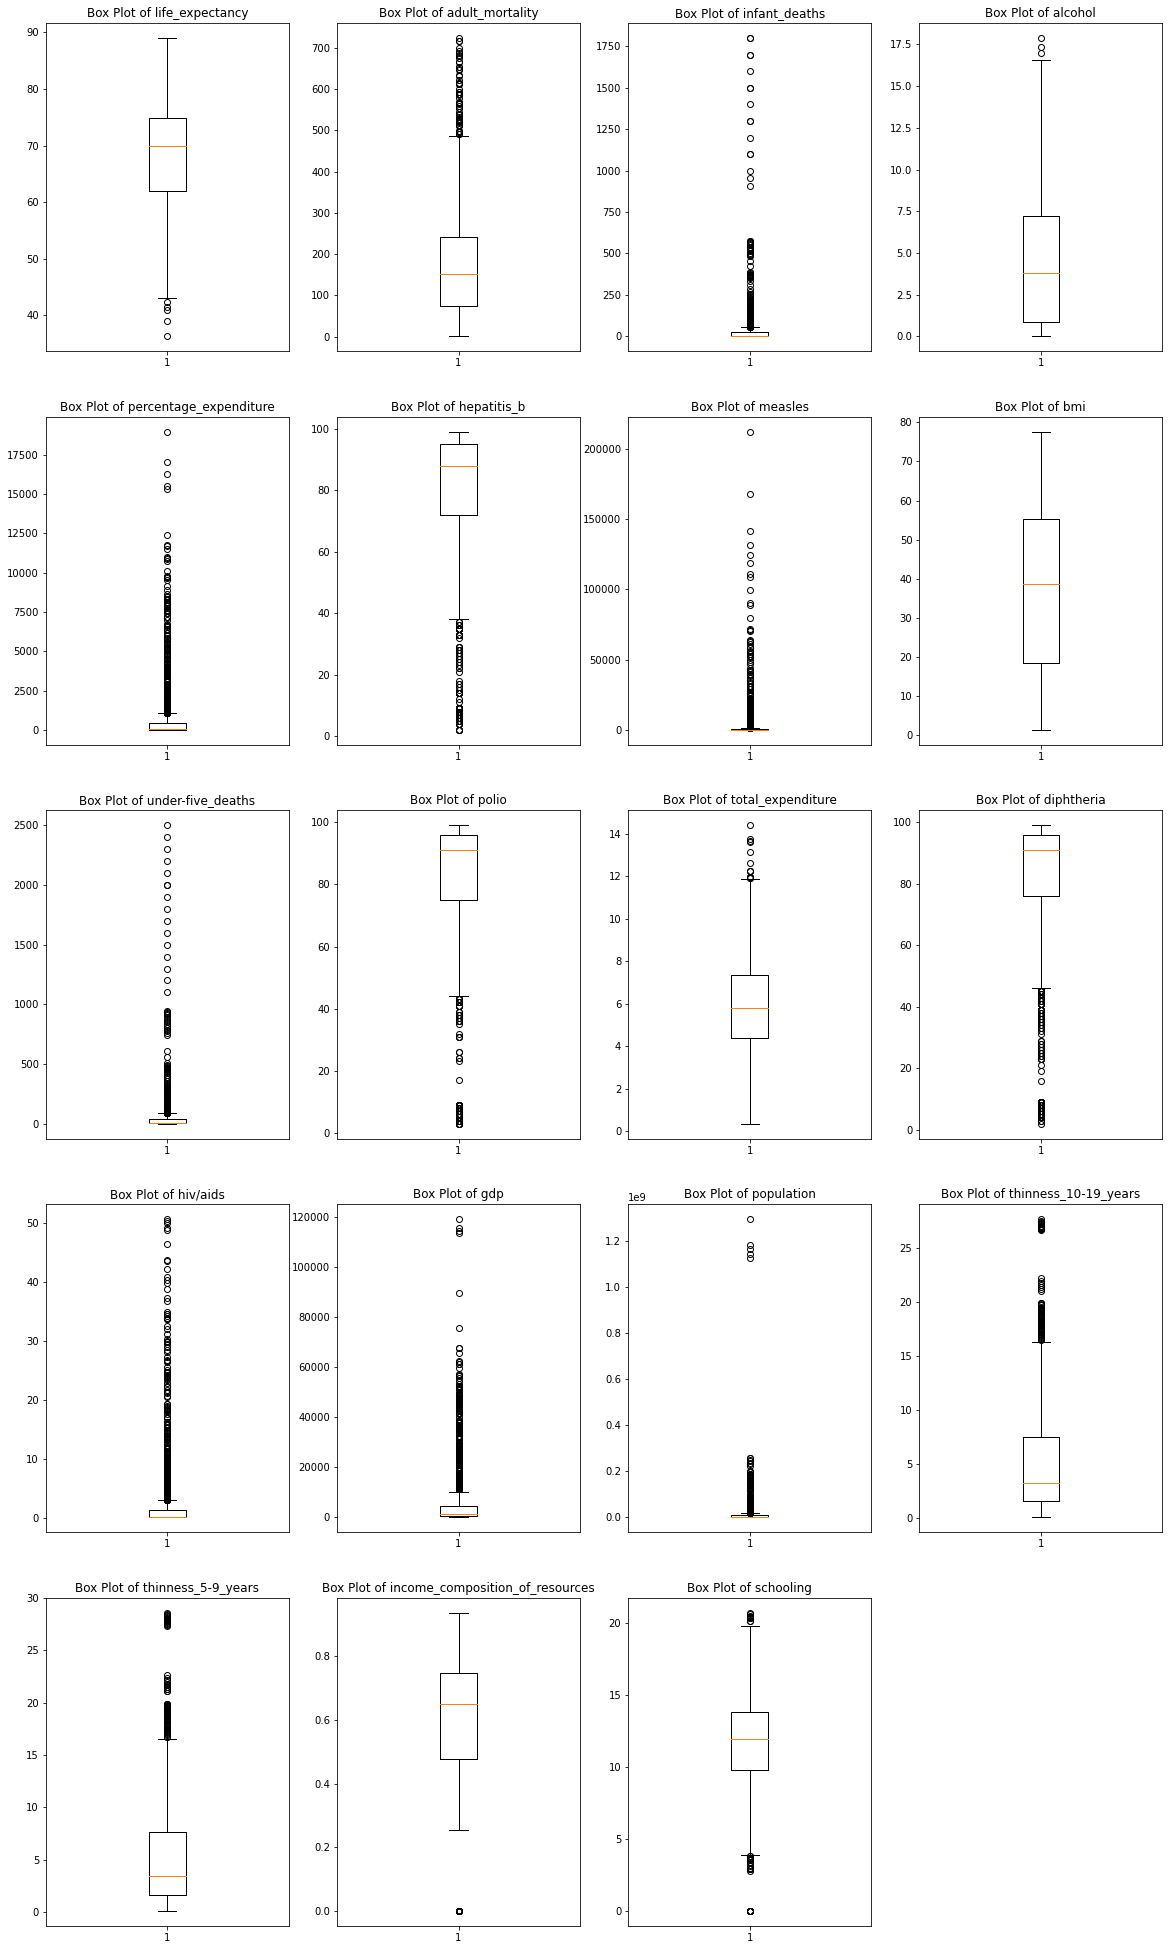

In [58]:
#We will use Winsorize method to treat the outliers
#First we will Visualize the outliers
# Create a dictionary of columns.
dict_c = {'life_expectancy':1,'adult_mortality':2,'infant_deaths':3,'alcohol':4,'percentage_expenditure':5,'hepatitis_b':6,'measles':7,'bmi':8,'under-five_deaths':9,'polio':10,'total_expenditure':11,'diphtheria':12,'hiv/aids':13,'gdp':14,'population':15,'thinness_10-19_years':16,'thinness_5-9_years':17,'income_composition_of_resources':18,'schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,35))

for var,i in dict_c.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[var],whis=1.5)
                     plt.title('Box Plot of {}'.format(var))

plt.show()

In [59]:
#Calculate the no. of outliers and % of outliers in each variable/predictor
for pred in dict_c.keys():
    q75, q25 = np.percentile(df[pred], [75 ,25])
    iqr = q75 - q25

    min_val_pred = q25 - (iqr*1.5)
    max_val_pred = q75 + (iqr*1.5)
    print("Count of outliers and percentage of it in {} : {} and {}".format(pred,len((np.where((df[pred] > max_val_pred) | (df[pred] < min_val_pred))[0])),len((np.where((df[pred] > max_val_pred) | (df[pred] < min_val_pred))[0]))*100/2110))


Count of outliers and percentage of it in life_expectancy : 5 and 0.23696682464454977
Count of outliers and percentage of it in adult_mortality : 61 and 2.890995260663507
Count of outliers and percentage of it in infant_deaths : 225 and 10.663507109004739
Count of outliers and percentage of it in alcohol : 3 and 0.14218009478672985
Count of outliers and percentage of it in percentage_expenditure : 251 and 11.895734597156398
Count of outliers and percentage of it in hepatitis_b : 199 and 9.431279620853081
Count of outliers and percentage of it in measles : 392 and 18.578199052132703
Count of outliers and percentage of it in bmi : 0 and 0.0
Count of outliers and percentage of it in under-five_deaths : 248 and 11.753554502369669
Count of outliers and percentage of it in polio : 174 and 8.246445497630331
Count of outliers and percentage of it in total_expenditure : 14 and 0.6635071090047393
Count of outliers and percentage of it in diphtheria : 209 and 9.90521327014218
Count of outliers an

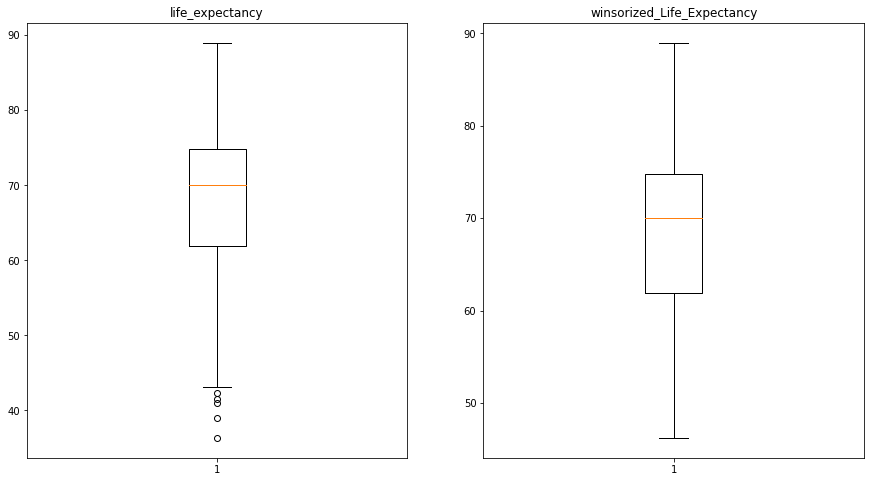

In [60]:
#In real life scenario, removing data is not wise, hence the criteria can be made a bit stringent by calculating outliers as 1.5* IQR to include most of the data.
# The outliers from the predictors is removed using the Winsorization method
#Winsorization is a way to minimize the influence of outliers in your data
# Plot of Life_Expectancy and Winsorize Life_Expectancy
from scipy.stats.mstats import winsorize
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
Life_Expectancy = df['life_expectancy']
plt.boxplot(Life_Expectancy)
plt.title("life_expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(df['life_expectancy'],(0.02,0),inplace=True)
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

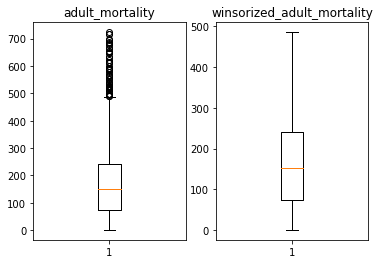

In [61]:
#Plot of Adult_Mortality and Winsorize Adult_Mortality
plt.subplot(1,2,1)
Adult_Mortality = df['adult_mortality']
plt.boxplot(Adult_Mortality)
plt.title("adult_mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(df['adult_mortality'],(0,0.03),inplace=True)
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_adult_mortality")

plt.show()

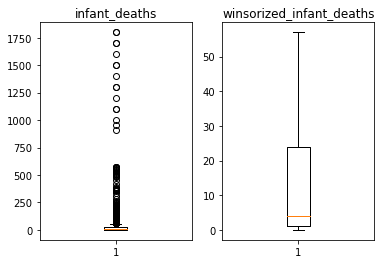

In [62]:
#Plot of Infant_Deaths and Winsorize Infant_Deaths
plt.subplot(1,2,1)
Infant_Deaths = df['infant_deaths']
plt.boxplot(Infant_Deaths)
plt.title("infant_deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(df['infant_deaths'],(0,0.11),inplace=True)
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_infant_deaths")

plt.show()

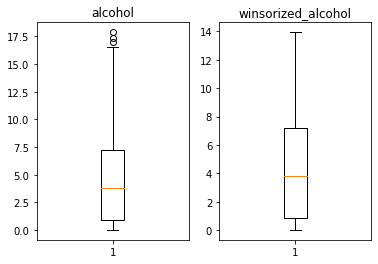

In [63]:
#Plot of Alcohol and Winsorize Alcohol
plt.subplot(1,2,1)
Alcohol = df['alcohol']
plt.boxplot(Alcohol)
plt.title("alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(df['alcohol'],(0,0.01),inplace=True)
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_alcohol")

plt.show()

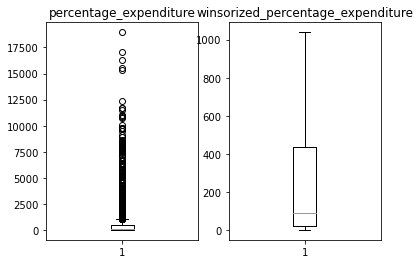

In [64]:
#Plot of Percentage Expenditure and Winsorize Percentage Expenditure
plt.subplot(1,2,1)
Percentage_Expenditure = df['percentage_expenditure']
plt.boxplot(Percentage_Expenditure)
plt.title("percentage_expenditure")

plt.subplot(1,2,2)
winsorized_Percentage_Expenditure = winsorize(df['percentage_expenditure'],(0,0.12),inplace=True)
plt.boxplot(winsorized_Percentage_Expenditure)
plt.title("winsorized_percentage_expenditure")

plt.show()

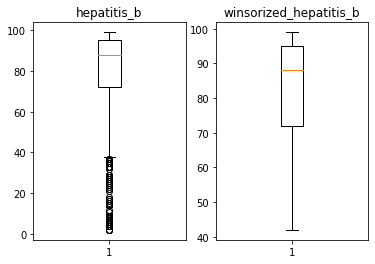

In [65]:
#Plot of Hepatitis B and Winsorize Hepatitis B
plt.subplot(1,2,1)
Hepatitis_B = df['hepatitis_b']
plt.boxplot(Hepatitis_B)
plt.title("hepatitis_b")

plt.subplot(1,2,2)
winsorized_Hepatitis_B = winsorize(df['hepatitis_b'],(0.10,0),inplace=True)
plt.boxplot(winsorized_Hepatitis_B)
plt.title("winsorized_hepatitis_b")

plt.show()

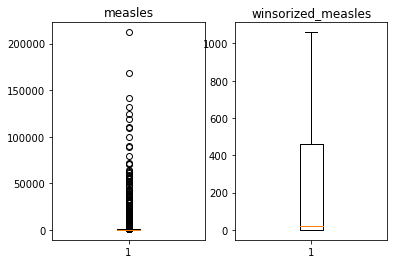

In [66]:
#Plot of Measles and Winsorize Measles
plt.subplot(1,2,1)
Measles = df['measles']
plt.boxplot(Measles)
plt.title("measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(df['measles'],(0,0.19),inplace=True)
plt.boxplot(winsorized_Measles)
plt.title("winsorized_measles")

plt.show()

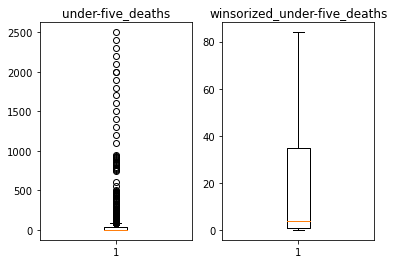

In [67]:
#Plot of Under-five_deaths and Winsorize Under-five_deaths
plt.subplot(1,2,1)
Under_five_deaths = df['under-five_deaths']
plt.boxplot(Under_five_deaths)
plt.title("under-five_deaths")

plt.subplot(1,2,2)
winsorized_Under_five_deaths = winsorize(df['under-five_deaths'],(0,0.12),inplace=True)
plt.boxplot(winsorized_Under_five_deaths)
plt.title("winsorized_under-five_deaths")

plt.show()

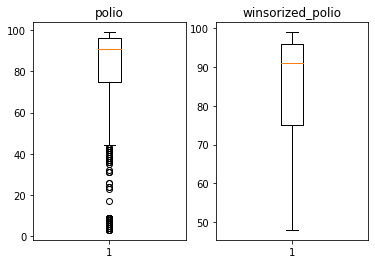

In [68]:
#Plot of Polio and Winsorize Under-five_deaths
plt.subplot(1,2,1)
polio = df['polio']
plt.boxplot(polio)
plt.title("polio")

plt.subplot(1,2,2)
winsorized_polio = winsorize(df['polio'],(0.10,0),inplace=True)
plt.boxplot(winsorized_polio)
plt.title("winsorized_polio")

plt.show()

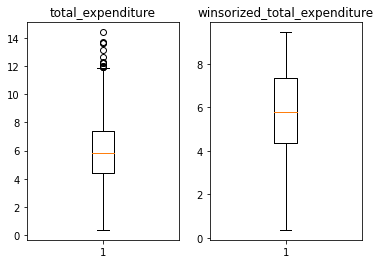

In [69]:
#Plot of total_expenditure and Winsorize total_expenditure
plt.subplot(1,2,1)
total_expenditure = df['total_expenditure']
plt.boxplot(total_expenditure)
plt.title("total_expenditure")

plt.subplot(1,2,2)
winsorized_total_expenditure = winsorize(df['total_expenditure'],(0,0.06),inplace=True)
plt.boxplot(winsorized_total_expenditure)
plt.title("winsorized_total_expenditure")

plt.show()

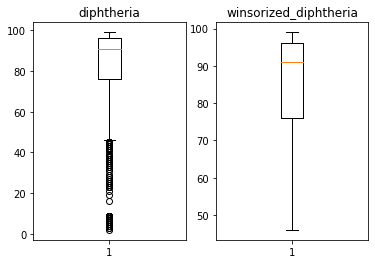

In [70]:
#Plot of diphtheria and Winsorize diphtheria
plt.subplot(1,2,1)
diphtheria = df['diphtheria']
plt.boxplot(diphtheria)
plt.title("diphtheria")

plt.subplot(1,2,2)
winsorized_diphtheria = winsorize(df['diphtheria'],(0.10,0),inplace=True)
plt.boxplot(winsorized_diphtheria)
plt.title("winsorized_diphtheria")

plt.show()

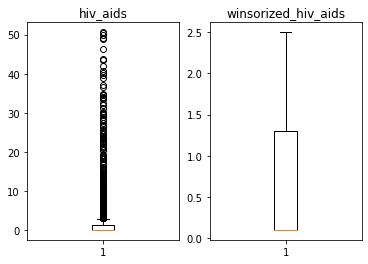

In [71]:
#Plot of hiv/aids and Winsorize hiv/aids
plt.subplot(1,2,1)
hiv_aids = df['hiv/aids']
plt.boxplot(hiv_aids)
plt.title("hiv_aids")

plt.subplot(1,2,2)
winsorized_hiv_aids = winsorize(df['hiv/aids'],(0,0.18),inplace=True)
plt.boxplot(winsorized_hiv_aids)
plt.title("winsorized_hiv_aids")

plt.show()

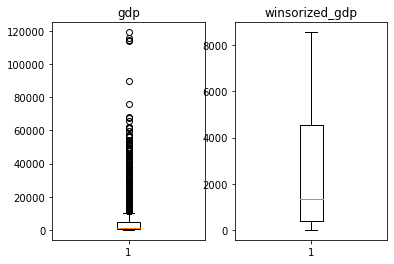

In [72]:
#Plot of gdp and Winsorize gdp
plt.subplot(1,2,1)
gdp = df['gdp']
plt.boxplot(gdp)
plt.title("gdp")

plt.subplot(1,2,2)
winsorized_gdp = winsorize(df['gdp'],(0,0.14),inplace=True)
plt.boxplot(winsorized_gdp)
plt.title("winsorized_gdp")

plt.show()

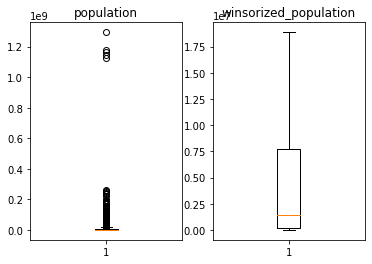

In [73]:
#Plot of population and Winsorize population
plt.subplot(1,2,1)
population = df['population']
plt.boxplot(population)
plt.title("population")

plt.subplot(1,2,2)
winsorized_population = winsorize(df['population'],(0,0.13),inplace=True)
plt.boxplot(winsorized_population)
plt.title("winsorized_population")

plt.show()

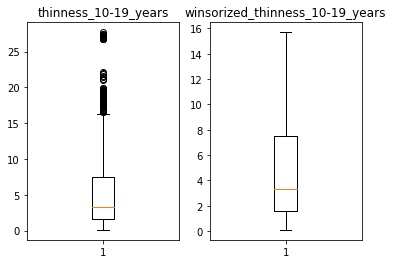

In [74]:
#Plot of thinness_10-19_years and Winsorize thinness_10-19_years
plt.subplot(1,2,1)
thinness_10_19_years = df['thinness_10-19_years']
plt.boxplot(thinness_10_19_years)
plt.title("thinness_10-19_years")

plt.subplot(1,2,2)
winsorized_thinness_10_19_years = winsorize(df['thinness_10-19_years'],(0,0.04),inplace=True)
plt.boxplot(winsorized_thinness_10_19_years)
plt.title("winsorized_thinness_10-19_years")

plt.show()

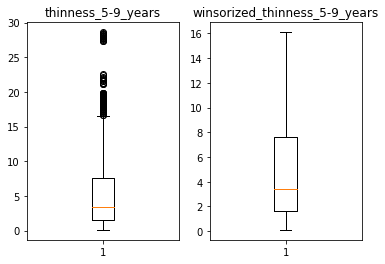

In [75]:
#Plot of thinness_5-9_years and Winsorize thinness_5-9_years
plt.subplot(1,2,1)
thinness_5_9_years = df['thinness_5-9_years']
plt.boxplot(thinness_5_9_years)
plt.title("thinness_5-9_years")

plt.subplot(1,2,2)
winsorized_thinness_5_9_years = winsorize(df['thinness_5-9_years'],(0,0.04),inplace=True)
plt.boxplot(winsorized_thinness_5_9_years)
plt.title("winsorized_thinness_5-9_years")

plt.show()

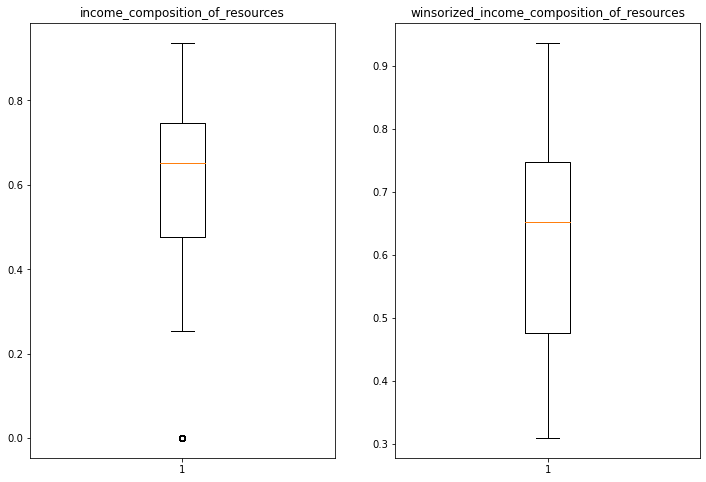

In [76]:
#Plot of income_composition_of_resources and Winsorize income_composition_of_resources
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
income_composition_of_resources = df['income_composition_of_resources']
plt.boxplot(income_composition_of_resources)
plt.title("income_composition_of_resources")

plt.subplot(1,2,2)
winsorized_income_composition_of_resources = winsorize(df['income_composition_of_resources'],(0.06,0),inplace=True)
plt.boxplot(winsorized_income_composition_of_resources)
plt.title("winsorized_income_composition_of_resources")

plt.show()

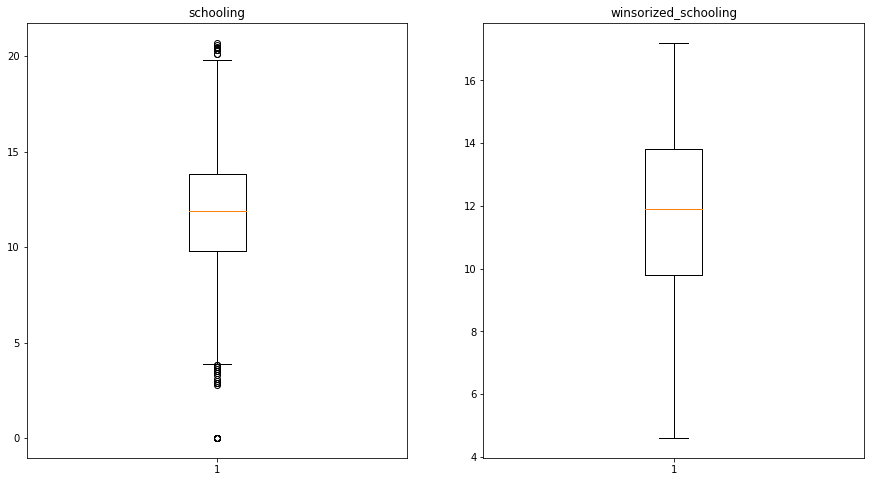

In [77]:
#Plot of schooling and Winsorize schooling
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
schooling = df['schooling']
plt.boxplot(schooling)
plt.title("schooling")

plt.subplot(1,2,2)
winsorized_schooling = winsorize(df['schooling'],(0.02,0.02),inplace=True)
plt.boxplot(winsorized_schooling)
plt.title("winsorized_schooling")

plt.show()

In [78]:
#After winsorization the outliers of all predictors have been removed as seen in their winsorized plots
#We will add these new winsorized predictors to the dataframe
df['winsorized_Life_Expectancy']=winsorized_Life_Expectancy
df['winsorized_Adult_Mortality']=winsorized_Adult_Mortality
df['winsorized_Infant_Deaths']=winsorized_Infant_Deaths
df['winsorized_Alcohol']=winsorized_Alcohol
df['winsorized_Percentage_Expenditure']=winsorized_Percentage_Expenditure
df['winsorized_Hepatitis_B']=winsorized_Hepatitis_B
df['winsorized_Measles']=winsorized_Measles
df['winsorized_Under_five_deaths']=winsorized_Under_five_deaths
df['winsorized_polio']=winsorized_polio
df['winsorized_total_expenditure']=winsorized_total_expenditure
df['winsorized_diphtheria']=winsorized_diphtheria
df['winsorized_hiv_aids']=winsorized_hiv_aids
df['winsorized_gdp']=winsorized_gdp
df['winsorized_population']=winsorized_population
df['winsorized_thinness_10_19_years']=winsorized_thinness_10_19_years
df['winsorized_thinness_5_9_years']=winsorized_thinness_5_9_years
df['winsorized_income_composition_of_resources']=winsorized_income_composition_of_resources
df['winsorized_schooling']=winsorized_schooling

In [79]:
df.describe()
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Expenditure', 'winsorized_Hepatitis_B',
       'winsorized_Measles', 'winsorized_Under_five_deaths',
       'winsorized_polio', 'winsorized_total_expenditure',
       'winsorized_diphtheria', 'winsorized_hiv_aids', 'winsorized_gdp',
       'winsorized_population', 'winsorized_thinness_10_19_years',
       'winsorized_thinness_5_9_years',
       'winsorized_income_composition_of_resources', 'winsorized_schooling'],
      dtype='object')

In [80]:
df.shape

(2110, 40)

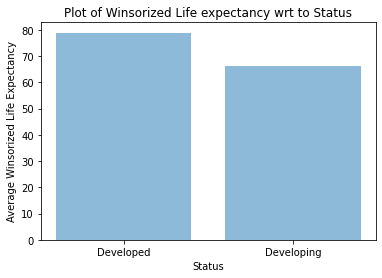

In [81]:
#Plot Life Expectancy wrt to Status
plt.bar(df.groupby('status')['status'].count().index, df.groupby('status')['winsorized_Life_Expectancy'].mean(), align='center', alpha=0.5)
plt.xlabel('Status')
plt.ylabel('Average Winsorized Life Expectancy')
plt.title('Plot of Winsorized Life expectancy wrt to Status')
plt.show()
#This shows developed nations has more average life expectancy as compared to developing nations

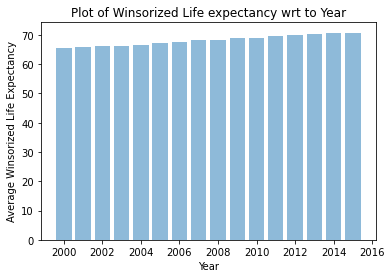

In [82]:
#Plot Life Expectancy wrt to Year
plt.bar(df.groupby('year')['year'].count().index, df.groupby('year')['winsorized_Life_Expectancy'].mean(), align='center', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Average Winsorized Life Expectancy')
plt.title('Plot of Winsorized Life expectancy wrt to Year')
plt.show()
#This shows Life Expectancy increases with year for all the countries

In [83]:
#Scatterplot between Winsorized Adult Mortality & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Adult_Mortality'],data=df)
plt.title("LifeExpectancy vs AdultMortality")

NameError: name 'sns' is not defined

Text(0.5,1,'LifeExpectancy vs InfantDeaths')

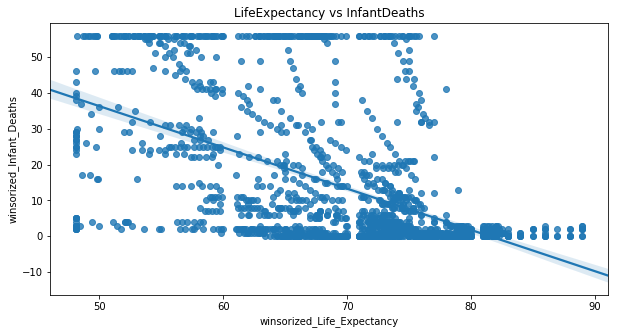

In [47]:
#Scatterplot between Winsorized Infant_Deaths & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Infant_Deaths'],data=df)
plt.title("LifeExpectancy vs InfantDeaths")

Text(0.5,1,'LifeExpectancy vs Alcohol')

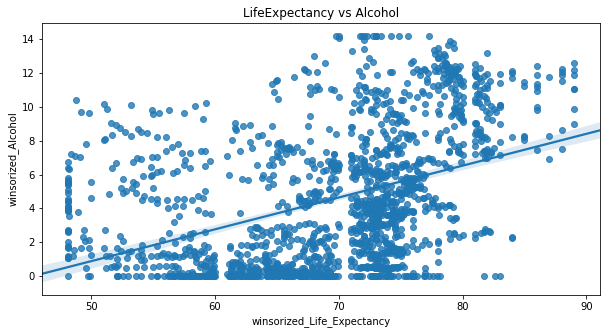

In [48]:
#Scatterplot between Winsorized Alcohol & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Alcohol'],data=df)
plt.title("LifeExpectancy vs Alcohol")

Text(0.5,1,'LifeExpectancy vs Percentage_Expenditure')

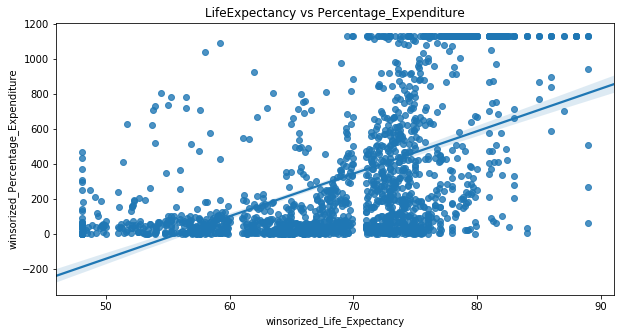

In [49]:
#Scatterplot between Winsorized Percentage_Expenditure & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Percentage_Expenditure'],data=df)
plt.title("LifeExpectancy vs Percentage_Expenditure")

Text(0.5,1,'LifeExpectancy vs Hepatitis_B')

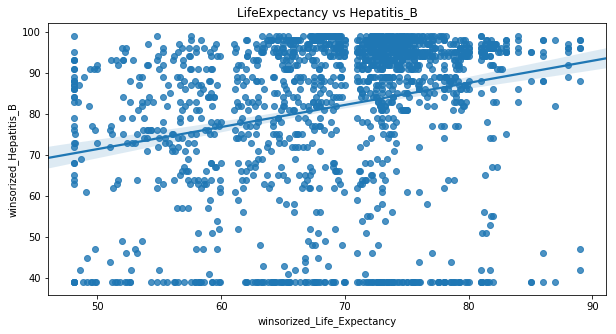

In [50]:
#Scatterplot between Winsorized Hepatitis_B & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Hepatitis_B'],data=df)
plt.title("LifeExpectancy vs Hepatitis_B")

Text(0.5,1,'LifeExpectancy vs Measles')

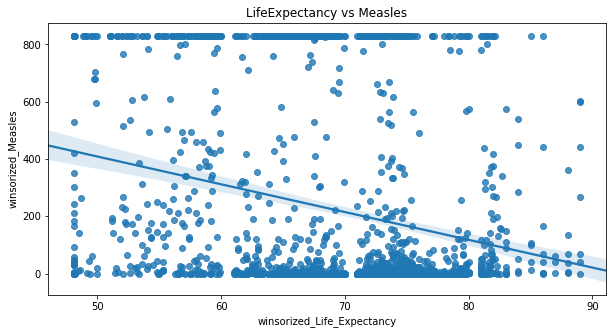

In [51]:
#Scatterplot between Winsorized Measles & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Measles'],data=df)
plt.title("LifeExpectancy vs Measles")

Text(0.5,1,'LifeExpectancy vs Under_five_deaths')

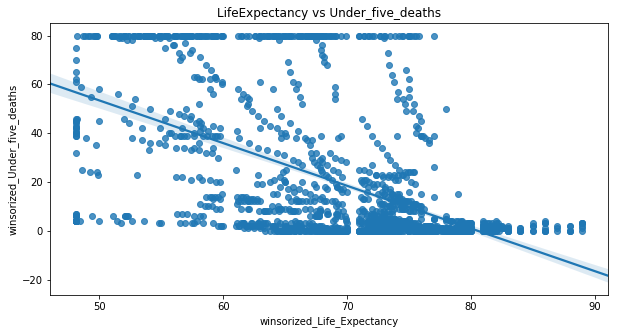

In [52]:
#Scatterplot between Winsorized Under_five_deaths & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Under_five_deaths'],data=df)
plt.title("LifeExpectancy vs Under_five_deaths")

Text(0.5,1,'LifeExpectancy vs polio')

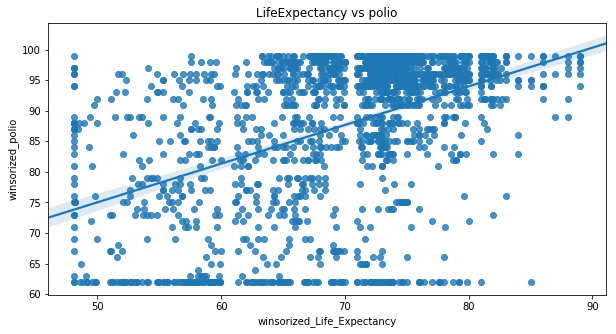

In [53]:
#Scatterplot between Winsorized polio & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_polio'],data=df)
plt.title("LifeExpectancy vs polio")

Text(0.5,1,'LifeExpectancy vs total_expenditure')

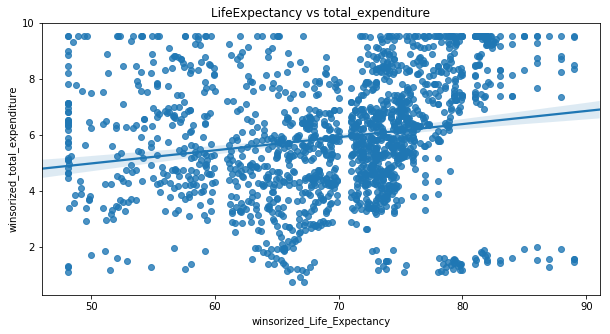

In [54]:
#Scatterplot between Winsorized total_expenditure & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_total_expenditure'],data=df)
plt.title("LifeExpectancy vs total_expenditure")

Text(0.5,1,'LifeExpectancy vs diphtheria')

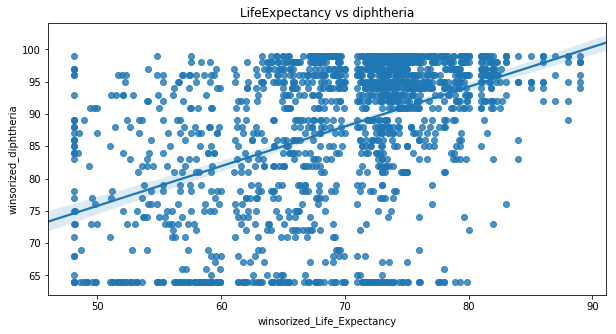

In [55]:
#Scatterplot between Winsorized diphtheria & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_diphtheria'],data=df)
plt.title("LifeExpectancy vs diphtheria")

Text(0.5,1,'LifeExpectancy vs hiv_aids')

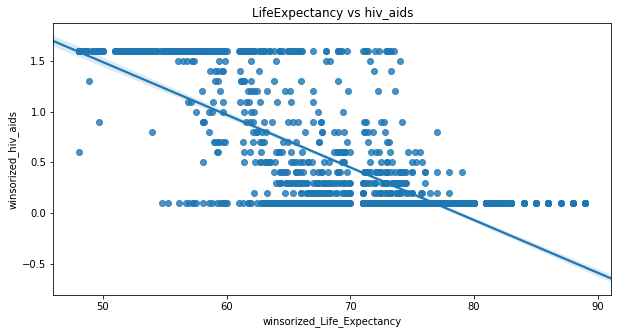

In [56]:
#Scatterplot between Winsorized hiv_aids & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_hiv_aids'],data=df)
plt.title("LifeExpectancy vs hiv_aids")

Text(0.5,1,'LifeExpectancy vs gdp')

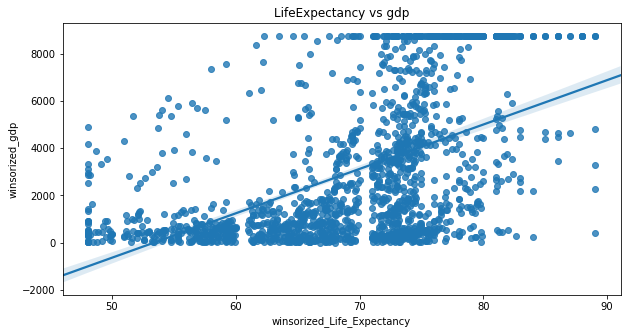

In [57]:
#Scatterplot between Winsorized gdp & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_gdp'],data=df)
plt.title("LifeExpectancy vs gdp")

Text(0.5,1,'LifeExpectancy vs population')

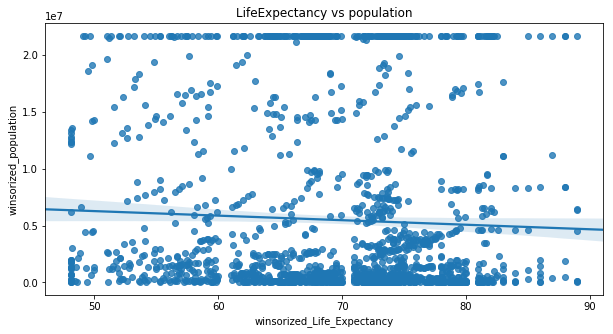

In [58]:
#Scatterplot between Winsorized population & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_population'],data=df)
plt.title("LifeExpectancy vs population")

Text(0.5,1,'LifeExpectancy vs thinness_10_19_years')

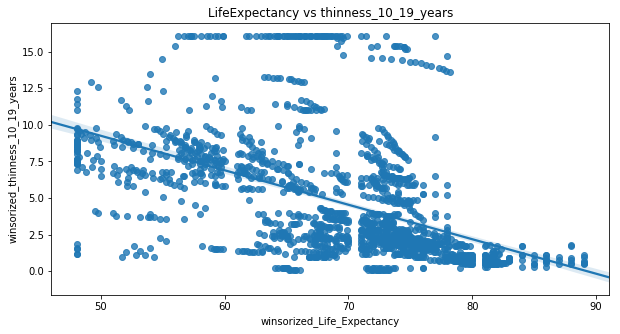

In [59]:
#Scatterplot between Winsorized thinness_10_19_years & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_thinness_10_19_years'],data=df)
plt.title("LifeExpectancy vs thinness_10_19_years")

Text(0.5,1,'LifeExpectancy vs thinness_10_19_years')

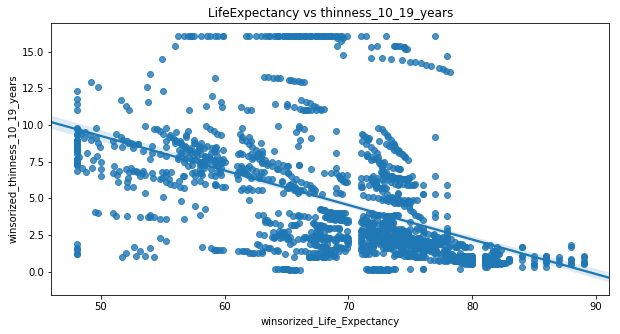

In [60]:
#Scatterplot between Winsorized thinness_10_19_years & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_thinness_10_19_years'],data=df)
plt.title("LifeExpectancy vs thinness_10_19_years")

Text(0.5,1,'LifeExpectancy vs thinness_5_9_years')

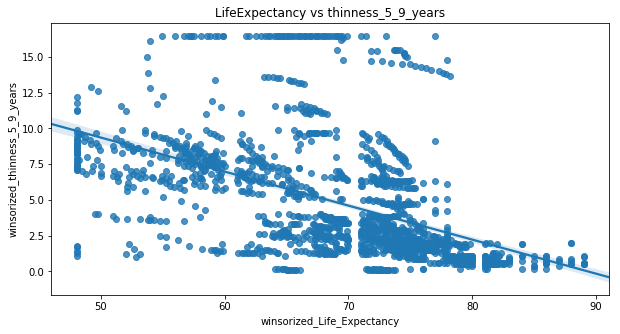

In [61]:
#Scatterplot between Winsorized thinness_5_9_years & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_thinness_5_9_years'],data=df)
plt.title("LifeExpectancy vs thinness_5_9_years")

Text(0.5,1,'LifeExpectancy vs income_composition_of_resources')

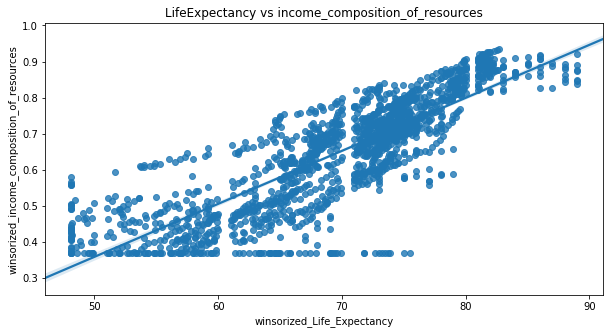

In [62]:
#Scatterplot between Winsorized income_composition_of_resources & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_income_composition_of_resources'],data=df)
plt.title("LifeExpectancy vs income_composition_of_resources")

Text(0.5,1,'LifeExpectancy vs schooling')

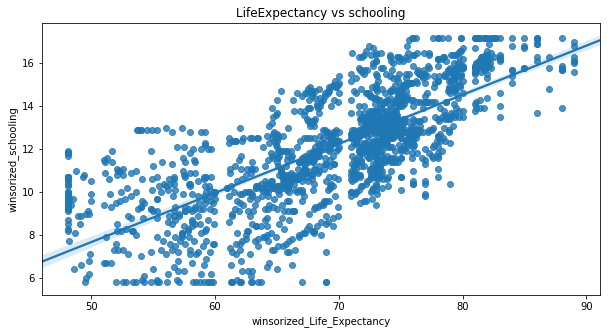

In [63]:
#Scatterplot between Winsorized schooling & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_schooling'],data=df)
plt.title("LifeExpectancy vs schooling")

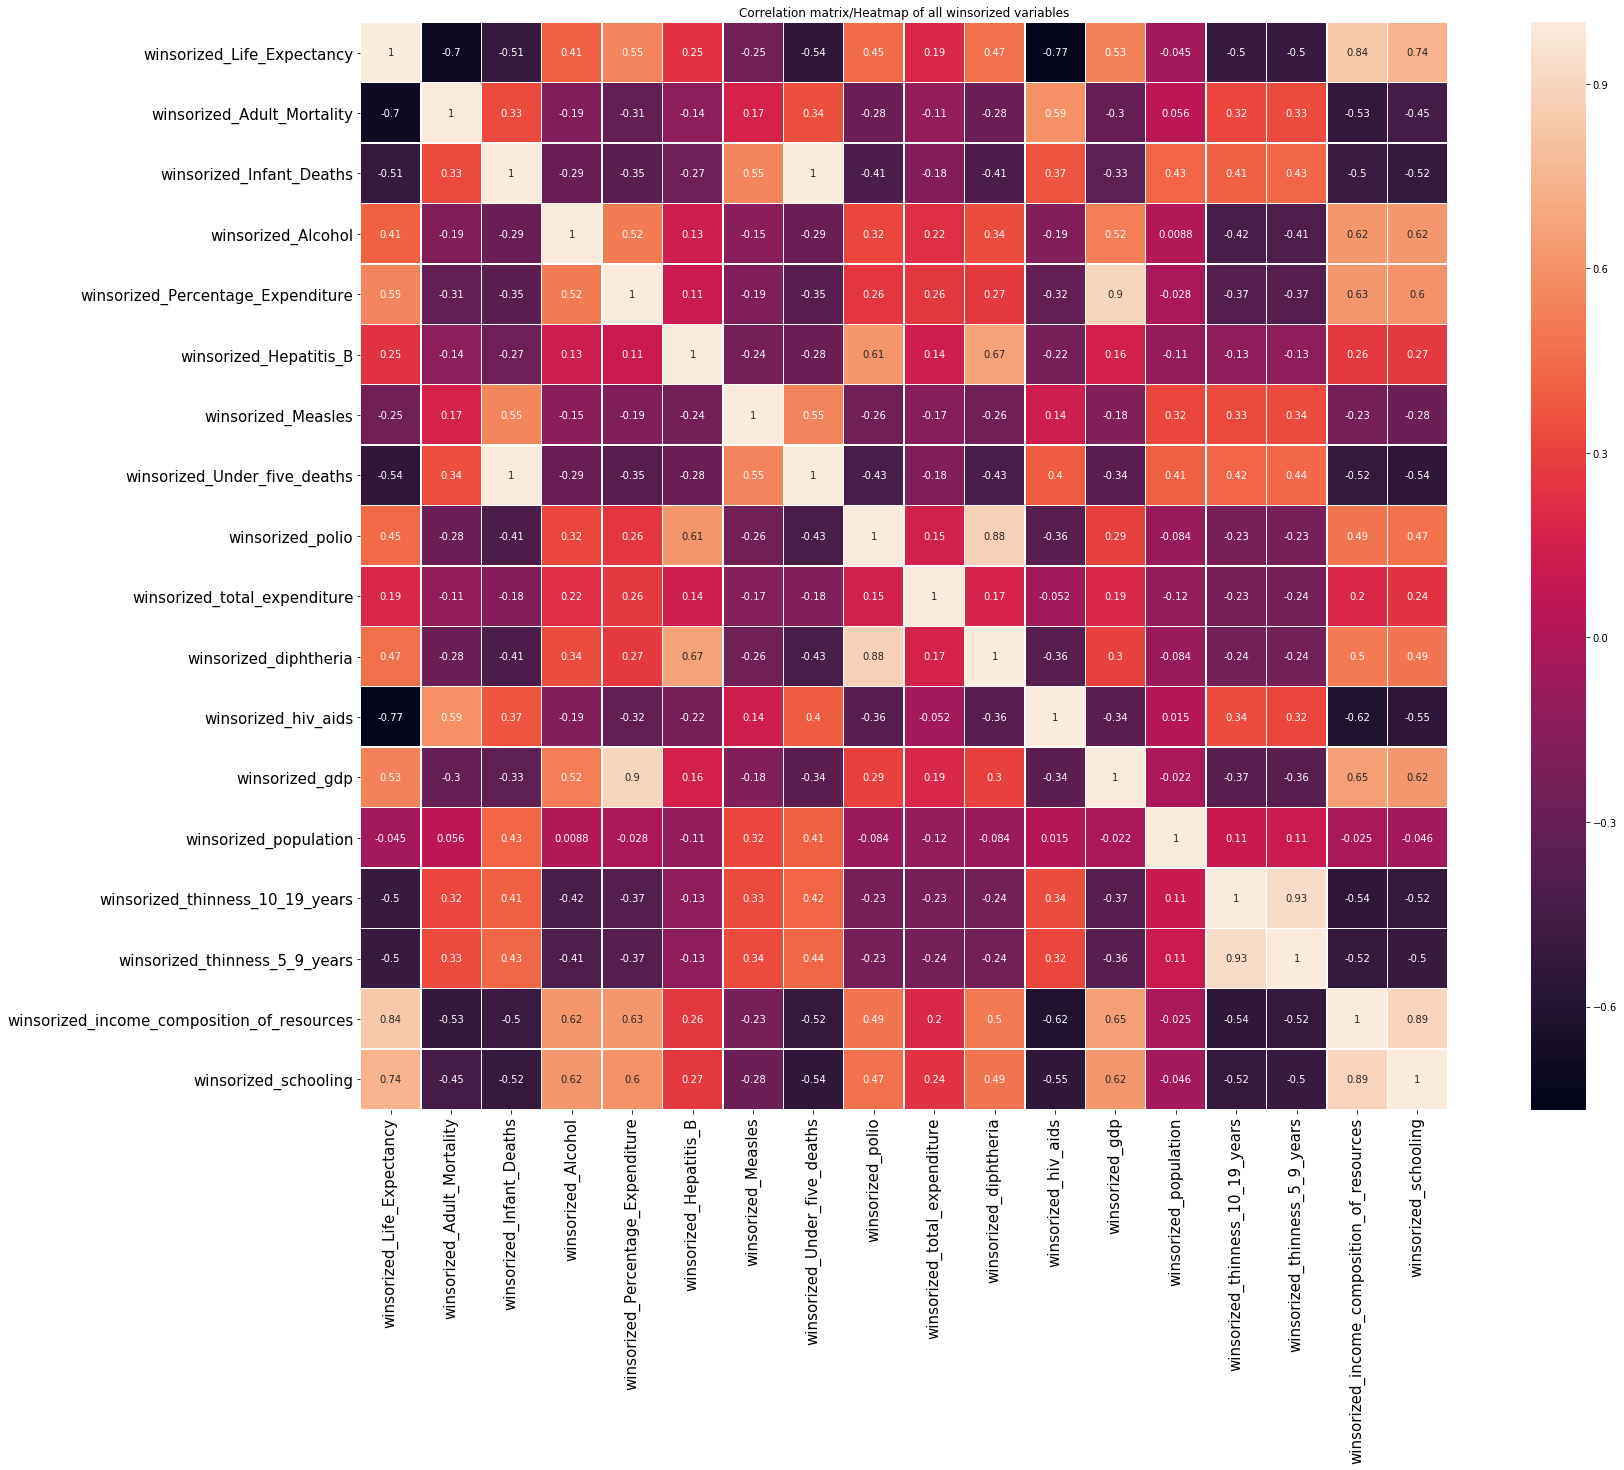

In [64]:
df.columns
wdf = df.iloc[:,22:]
wdf['country'] = df['country']
wdf['year'] = df['year']
wdf['status'] = df['status']
wdf_final = wdf.iloc[:,:-3]
cmatrix = wdf_final.corr()

plt.figure(figsize=(30,20))
plt.tick_params(axis='both',labelsize=15)
sns.heatmap(cmatrix, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix/Heatmap of all winsorized variables")
plt.show()

### From the above matrix it is understood the following variables are correlated to winsorized_Life_Expectancy:

### winsorized_Percentage_expenditure,winsorized_polio,winsorized_diphtheria,winsorized_gdp,winsorized_income_composition_of_resources,winsorized_schooling

### winsorized_Adult_Mortality and winsorized_hiv_aids are highly nehatively correlated with winsorized_Life_Expectancy

### Also some variables are correlated to each other like, winsorized_schooling and winsorized_income_composition_of_resources,

### winsorized_Infant_Deaths with winsorized_Under_five_deaths, winsorized_gdp with winsorized_Percentage_expenditure, winsorized_thinness_10_19_years with winsorized_thinness_5_9_years

### Features should not be correlated with each other. We drop those features/variables wrt to their corrrelation with our target variable ie. winsorized_Life_Expectancy

### Categorical columns like 'country' and 'year' have been dropped because they don't affect the life expectency much

In [65]:
#We create a new dataframe having variables/features having high correlation(positive and negative greater than +/- 0.6) with the target variable ie. winsorized_Life_Expectancy
new_df= wdf[['status','winsorized_Life_Expectancy','winsorized_Adult_Mortality','winsorized_income_composition_of_resources','winsorized_schooling','winsorized_hiv_aids']]

In [66]:
#Converting the categorical variable 'status' into numerical using one hot encoding method
new_df = new_df.join(pd.get_dummies(new_df.status)).drop(columns='status').copy()
new_df.head()

winsorized_Life_Expectancy  winsorized_Adult_Mortality  \
0                        65.0                       263.0   
1                        59.9                       271.0   
2                        59.9                       268.0   
3                        59.5                       272.0   
4                        59.2                       275.0   

   winsorized_income_composition_of_resources  winsorized_schooling  \
0                                       0.479                  10.1   
1                                       0.476                  10.0   
2                                       0.470                   9.9   
3                                       0.463                   9.8   
4                                       0.454                   9.5   

   winsorized_hiv_aids  Developed  Developing  
0                  0.1          0           1  
1                  0.1          0           1  
2                  0.1          0           1  
3                  0.1          0           1  
4                  0.1          0           1

### Regression Task

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = new_df[['winsorized_Adult_Mortality', 'winsorized_income_composition_of_resources', 'winsorized_schooling', 'winsorized_hiv_aids', 'Developed', 'Developing']]
y = new_df['winsorized_Life_Expectancy']
# split into training and test data set 
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Linear Regression

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

lr = LinearRegression().fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train)

# Mean Cross validation Score
print("Cross-validation scores: {}".format(cv_scores))
print("Average Cross-validation scores: {:.2f}".format(cv_scores.mean()))
# Print Co-efficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

# Check test data set performance
print("Linear Regression Train Performance: ", lr.score(X_train,y_train))
print("Linear Regression Test Performance: ", lr.score(X_test,y_test))


Cross-validation scores: [0.85461547 0.83291531 0.80441798]
Average Cross-validation scores: 0.83
lr.coef_: [-8.6168375  15.31425702  1.01820335 -6.56832925  0.35634035 -0.35634035]
lr.intercept_: 66.41778801249927
Linear Regression Train Performance:  0.8341737208956111
Linear Regression Test Performance:  0.8434385764691325


C:\Users\khush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


### Polynomial Regression

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures()
lreg = LinearRegression()

#define a list of parameters
param_poly = {'polynomialfeatures__degree':range(1,3)}

pipe_poly = make_pipeline(PolynomialFeatures(), LinearRegression())
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=10, return_train_score = True, scoring='r2')
grid_poly.fit(X_train, y_train)

#find best parameters
print("Best Mean Cross-validation score: {:}".format(grid_poly.best_score_))
print('Best Parameters: ', grid_poly.best_params_)
print()

# Check data set performance
print("Linear Polynomial Train Performance: ", grid_poly.score(X_train,y_train))
print("Linear Polynomial Test Performance: ", grid_poly.score(X_test,y_test))

Best Mean Cross-validation score: 0.8960998849545461
Best Parameters:  {'polynomialfeatures__degree': 2}

Linear Polynomial Train Performance:  0.902061599870236
Linear Polynomial Test Performance:  0.91555594863995


In [70]:
from sklearn.model_selection import cross_val_score
poly = PolynomialFeatures(2)
X_trainpoly = poly.fit_transform(X_train_org)
X_testpoly = poly.fit_transform(X_test_org)

score = cross_val_score (lreg, X_trainpoly, y_train, cv = 5, scoring = 'r2')
print( " Train r2 CrossVal score: {}".format ( score ))
print( "Train Avg CrossVal score: {:.2f}".format ( score.mean()))

score = cross_val_score (lreg, X_testpoly, y_test, cv = 5, scoring = 'r2')
print( " Test r2 CrossVal score: {}".format ( score))
print( "Test Avg CrossVal score: {:.2f}".format ( score.mean()))

 Train r2 CrossVal score: [0.90748068 0.90395518 0.8878344  0.8945067  0.89251666]
Train Avg CrossVal score: 0.90
 Test r2 CrossVal score: [0.92115474 0.91893684 0.8930159  0.92375709 0.88615173]
Test Avg CrossVal score: 0.91


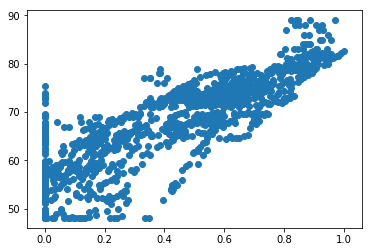

In [71]:
X_train_1 = X_train[:,1].reshape(-1,1)
plt.scatter(X_train_1,y_train)

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [72]:
print(train_score_list)
print(test_score_list)

[0.8341737208956109, 0.9020615998702362]
[0.8434385764691326, 0.91555594863995]


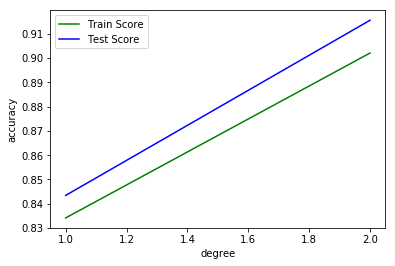

In [73]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

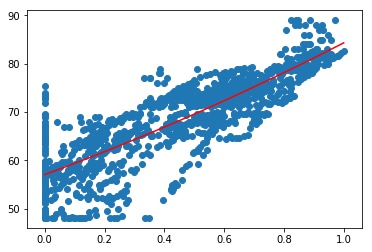

In [74]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,1].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

### KNN Regressor

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
X_train_org, X_test_org, y_train, y_test = train_test_split (X, y, test_size=.25, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

knn_range = list(range(1, 21))
param_grid = dict(n_neighbors=knn_range)
print(param_grid)

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score = True,scoring='r2')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
Best parameters: {'n_neighbors': 2}
Highest CrossVal score: 0.93


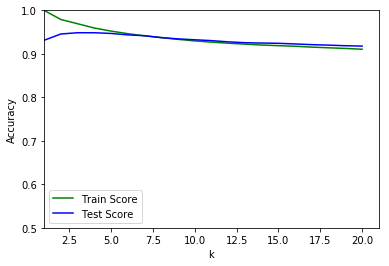

In [76]:
%matplotlib inline
train_array = []
test_array = []

for k in range(1,21):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_array.append(knn_reg.score(X_train, y_train))
    test_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,21)
plt.plot(x_axis, train_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_array, c = 'b', label = 'Test Score')
plt.axis([1, 21, 0.5, 1])
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [77]:
score = cross_val_score (KNeighborsRegressor(n_neighbors = 2), X_train_org, y_train, cv = 5, scoring = 'r2')
print( " Train r2 CrossVal score: {}".format ( score ))
print( "Train Avg CrossVal score: {:.2f}".format ( score.mean()))

score = cross_val_score (KNeighborsRegressor(n_neighbors = 2), X_test_org, y_test, cv = 5, scoring = 'r2')
print( " Test r2 CrossVal score: {}".format ( score))
print( "Test Avg CrossVal score: {:.2f}".format ( score.mean()))

 Train r2 CrossVal score: [0.85538497 0.8760274  0.8853239  0.87730836 0.88582479]
Train Avg CrossVal score: 0.88
 Test r2 CrossVal score: [0.72843353 0.91048281 0.91216818 0.85733852 0.85305588]
Test Avg CrossVal score: 0.85


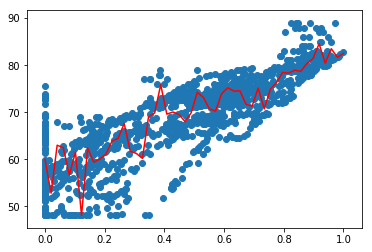

In [78]:
X_b = X_train[:,1].reshape(-1,1)
y_b = y_train[:]

knn_reg = KNeighborsRegressor(2)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max()).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

### Ridge Regression

In [79]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.83
Test set score: 0.84


In [80]:
ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True)
grid_ridge.fit(X_train, y_train)

grid_ridge_train_score = grid_ridge.score(X_train, y_train)
grid_ridge_test_score = grid_ridge.score(X_test, y_test)

print('Training set score: ', grid_ridge_train_score)
print('Test set score: ', grid_ridge_test_score)

#find best parameters
print('best parameters:',grid_ridge.best_params_)
print('Best cross-validation score:', grid_ridge.best_score_)

Training set score:  0.8341724022511983
Test set score:  0.8433247733811156
best parameters: {'alpha': 0.1}
Best cross-validation score: 0.8302365882371674


In [81]:
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

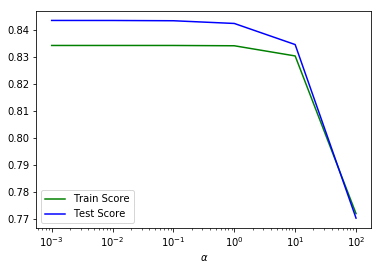

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [83]:
print(train_score_list)
print(test_score_list)

[0.8341737207609198, 0.8341737074525997, 0.8341724022511983, 0.8340634862210886, 0.8302939436808956, 0.7719212647655823]
[0.8434374368703588, 0.8434271818366801, 0.8433247733811156, 0.8423206313102981, 0.8345081303032498, 0.7702561351022694]


In [84]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8342
Test score: 0.8434


In [85]:
ridge.coef_


array([-8.61679181, 15.31339455,  1.01895721, -6.56841237,  0.35637621,
       -0.35637621])

In [86]:
ridge.intercept_

66.41781833863945

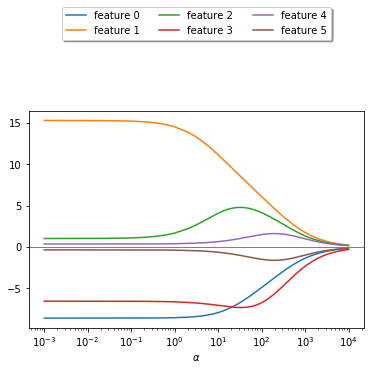

In [87]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,6):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### Lasso Regression

In [88]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.61
Test set score: 0.60
Number of features used: 2


In [89]:
lasso = Lasso(max_iter=1000, tol = 1e-5)

#define a list of parameters
param_lasso = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True)
grid_lasso.fit(X_train, y_train)

grid_lasso_train_score = grid_lasso.score(X_train, y_train)
grid_lasso_test_score = grid_lasso.score(X_test, y_test)

print('Training set score: ', grid_lasso_train_score)
print('Test score: ', grid_lasso_test_score)

#find best parameters
print('Best parameters: ', grid_lasso.best_params_)
print('Best cross-validation score:', grid_lasso.best_score_)

Training set score:  0.8341737173193439
Test score:  0.843439460510828
Best parameters:  {'alpha': 0.0001}
Best cross-validation score: 0.8302199082768333


In [90]:
x_range = [0.0001,0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

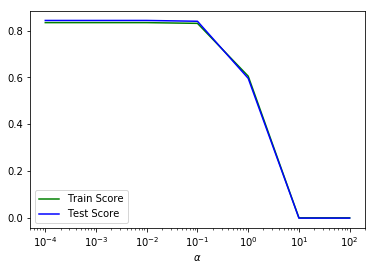

In [91]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [92]:
lasso_grid = Lasso(0.0001, max_iter=100000)
scores = cross_val_score(lasso_grid, X_train, y_train, cv = 5, scoring = 'r2')
print( " Train r2 CrossVal score: {}".format ( score ))
print( "Train Avg CrossVal score: {:.2f}".format ( score.mean()))

scores = cross_val_score(lasso_grid, X_test, y_test, cv = 5, scoring = 'r2')
print( " Test r2 CrossVal score: {}".format ( score ))
print( "Test Avg CrossVal score: {:.2f}".format ( score.mean()))


 Train r2 CrossVal score: [0.72843353 0.91048281 0.91216818 0.85733852 0.85305588]
Train Avg CrossVal score: 0.85
 Test r2 CrossVal score: [0.72843353 0.91048281 0.91216818 0.85733852 0.85305588]
Test Avg CrossVal score: 0.85


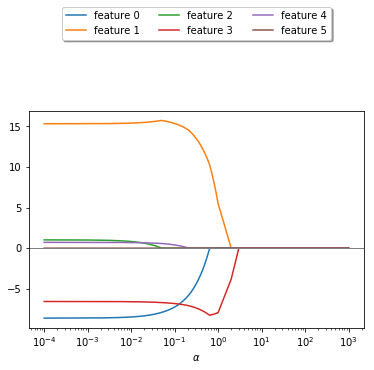

In [93]:
%matplotlib inline

x_range1 = np.linspace(0.0001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,6):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### Support Vector Machine

In [94]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

### Linear SVM

In [95]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv = 2, return_train_score = True, scoring = 'r2')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1}
Highest CrossVal score: 0.82


In [96]:
lin_svm = LinearSVR( C = 10 )

lin_svm.fit( X_train, y_train )
print( lin_svm.score ( X_train, y_train ))
print( lin_svm.score ( X_test, y_test ))

0.8268628725841723
0.828713502245338


Text(0.5,0,'C')

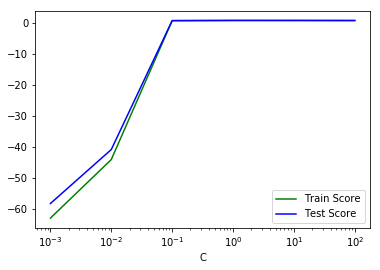

In [97]:
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for c in x_range: 
    lin_svm = LinearSVR( C = c )
    lin_svm.fit( X_train, y_train )
    train_score_list.append( lin_svm.score( X_train,y_train ))
    test_score_list.append( lin_svm.score( X_test, y_test ))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 4)
plt.xlabel('C')

In [98]:
score = cross_val_score(LinearSVR(C = 10), X_train, y_train,cv = 5, scoring = 'r2')
print(" Train CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(LinearSVR(C = 10), X_test, y_test, cv = 10, scoring = 'r2')
print("Test CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

 Train CrossVal score: [0.83723643 0.83911693 0.83338811 0.81867687 0.78752652]
Avg CrossVal score: 0.82
Test CrossVal score: [0.78532272 0.85709348 0.76760039 0.86060955 0.84735921 0.87918307
 0.78093448 0.85531512 0.78957948 0.81939998]
Avg CrossVal score: 0.82


### Kernalized SVM-rbf(Radial Basis Function)

In [99]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVR
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, .1, 10, 100]}

grid_search = GridSearchCV(SVR( kernel = 'rbf'), param_grid, return_train_score = True, cv = 5, scoring = 'r2')

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best Parameter: {'C': 100, 'gamma': 1}
Highest CrossVal score: 0.91


In [100]:
score = cross_val_score(SVR(C = 10, kernel = 'rbf', gamma = 10), X_train, y_train,cv = 5, scoring = 'r2')
print("Train CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(SVR(C =10, kernel = 'rbf', gamma = 10), X_test, y_test, cv = 5, scoring = 'r2')
print("Test CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Train CrossVal score: [0.86794215 0.89272505 0.89750143 0.90027519 0.87478751]
Avg CrossVal score: 0.89
Test CrossVal score: [0.75263879 0.7687358  0.79130177 0.70683619 0.75914669]
Avg CrossVal score: 0.76


### Kernalized SVM-poly

In [101]:
param_grid = {'degree': [1,2,3,4,5],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel='poly', gamma = 'auto'), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'degree': 4}
Best cross-validation score: 0.88


In [102]:
svr_poly_grid = SVR(kernel='poly',degree = 4, C=100, gamma = 'auto')

scores = cross_val_score(svr_poly_grid, X_train, y_train, cv = 10, scoring = 'r2')
print(" Train Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svr_poly_grid, X_test, y_test, cv = 10, scoring = 'r2')
print(" Test Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

 Train Cross-validation scores: [0.88647144 0.88614398 0.88249398 0.86577711 0.89678218 0.86856459
 0.89283252 0.86797102 0.88340442 0.88903801]
Average cross-validation score: 0.88
 Test Cross-validation scores: [0.89865953 0.87107421 0.86720764 0.90787359 0.8477801  0.8863711
 0.89964523 0.87881629 0.80511496 0.88138166]
Average cross-validation score: 0.87


### Kernalized SVM-Linear

In [103]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'gamma': 0.001}
Best cross-validation score: 0.82


In [104]:
svr_linear_grid = SVR(kernel='linear', gamma = 0.001 , C =1)

scores = cross_val_score(svr_linear_grid, X_train, y_train, cv = 10, scoring = 'r2')
print(" Train Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svr_linear_grid, X_test, y_test, cv = 10, scoring = 'r2')
print(" Test Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

 Train Cross-validation scores: [0.83225365 0.84440713 0.85828849 0.80569938 0.85483228 0.79886514
 0.83245545 0.80030815 0.81548991 0.75967281]
Average cross-validation score: 0.82
 Test Cross-validation scores: [0.77830195 0.85802654 0.78165668 0.8547803  0.84190796 0.87427345
 0.76162823 0.85508539 0.80334171 0.83592297]
Average cross-validation score: 0.82


### Best Regressor and Parameters

###__ Of all the regression models Polynomial Regression has the comparatively best values from Train,test and cross validation. The Values of train and test are close enough which are 0.91 and 0.92 respectively.The best parameter is Polynomial regression of degree 2.

In [105]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin2 = LinearRegression() 
lin2.fit(X_train_poly, y_train) 
y_pred = lin2.predict(X_test_poly)

print('R-Square', metrics.r2_score(y_test, y_pred))

R-Square 0.9156094561518738


### Project 2

### Decision Tree Regressor

In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor(random_state = 0)
#define a list of parameters
dtree_param = {"max_depth": range(1,10),
               "min_samples_split": range(2,10,1),
               "max_leaf_nodes": range(2,5)}

#apply grid search
dtree_grid = GridSearchCV(dtree, dtree_param, cv=5,n_jobs=-1,return_train_score = True,scoring='r2')
dtree_grid.fit(X_train, y_train)

#find best parameters
print("Best Mean Cross-validation score: {:}".format(dtree_grid.best_score_))
print('Best Parameters: ', dtree_grid.best_params_)

# Check data set performance
print("Decision Tree Train Performance: ", dtree_grid.score(X_train,y_train))
print("Decision Tree Test Performance: ", dtree_grid.score(X_test,y_test))
print('Validation score is: ' ,dtree_grid.score(X_test,y_test))



Best Mean Cross-validation score: 0.7274615423565465
Best Parameters:  {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}
Decision Tree Train Performance:  0.7409713848413834
Decision Tree Test Performance:  0.7431722536182515
Validation score is:  0.7431722536182515


# Ensemble Models

## Bagging

### Model 1- Decision Tree

In [107]:
from sklearn.ensemble import BaggingRegressor
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

bagg_dtree = BaggingRegressor(base_estimator= dtree, bootstrap=True, random_state=0, oob_score=True)

bagg_dtree_param = {'base_estimator__max_depth': range(1,10),
                    'max_samples': [0.8,1],
                    'n_estimators': [10,25,100]}
bagg_dtree_grid = GridSearchCV(bagg_dtree, bagg_dtree_param,cv=5,n_jobs=-1,return_train_score=True, scoring='r2')
bagg_dtree_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {bagg_dtree_grid.best_score_}')
print(f'Best Parameters {bagg_dtree_grid.best_params_}')
print(f'Train score is {bagg_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {bagg_dtree_grid.score(X_test,y_test)}')
print(f'Validation score is {bagg_dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9311270518617458
Best Parameters {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9764141395980167
Test score is 0.9537057103104832
Validation score is 0.9537057103104832


In [108]:
#from  sklearn.metrics import accuracy_score
bagg_dtree = BaggingRegressor(DecisionTreeRegressor(random_state = 0,max_depth=9),max_samples=0.8,n_estimators=100, bootstrap=True, random_state=0, oob_score=True)
bagg_dtree.fit(X_train,y_train)
bagg_dtree.score(X_test, y_test)

0.9537057103104832

In [109]:
bagg_dtree.fit(X_train, y_train)
y_pred = bagg_dtree.predict(X_test)
print('Train score: {:.2f}'.format(bagg_dtree.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bagg_dtree.score(X_test, y_test)))

Train score: 0.98
Test score: 0.95


### Model 2- Lasso

In [110]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

bagg_lasso = BaggingRegressor(base_estimator=Lasso(), bootstrap=True, random_state=0, oob_score=False)

bagg_lasso_param = {'base_estimator__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                   'max_samples': [0.8,1],'n_estimators': [10,25,100]}

bagg_lasso_grid = GridSearchCV(bagg_lasso, bagg_lasso_param,cv=5,n_jobs=-1,return_train_score=True,scoring='r2')
bagg_lasso_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {bagg_lasso_grid.best_score_}')
print(f'Best Parameters {bagg_lasso_grid.best_params_}')
print(f'Train score is {bagg_lasso_grid.score(X_train,y_train)}')
print(f'Test score is {bagg_lasso_grid.score(X_test,y_test)}')
print(f'Validation score is {bagg_lasso_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8304527183169559
Best Parameters {'base_estimator__alpha': 0.01, 'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.8341331108047809
Test score is 0.8430206805383942
Validation score is 0.8430206805383942


## Pasting

### Model 1- Decision Tree

In [111]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

pasting_dtree = BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False, random_state=0, oob_score=False)

pasting_dtree_param = {'base_estimator__max_depth': range(1,10),
                      'max_samples': [0.8,1],'n_estimators': [10,25,100]}

pasting_dtree_grid = GridSearchCV(pasting_dtree, pasting_dtree_param, cv=5,n_jobs=-1, return_train_score=True,scoring='r2')
pasting_dtree_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {pasting_dtree_grid.best_score_}')
print(f'Best Parameters {pasting_dtree_grid.best_params_}')
print(f'Train score is {pasting_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {pasting_dtree_grid.score(X_test,y_test)}')
print(f'Validation score is {pasting_dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9284461276868777
Best Parameters {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9827009837186753
Test score is 0.9530542713270769
Validation score is 0.9530542713270769


### Model 2- Ridge

In [112]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

pasting_ridge = BaggingRegressor(base_estimator= Ridge(), bootstrap=False, random_state=0, oob_score=False)
pasting_ridge_param = {'base_estimator__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                     'max_samples': [0.8,1], 'n_estimators': [10,25,100]}

pasting_ridge_grid = GridSearchCV(pasting_ridge, pasting_ridge_param,n_jobs=-1,cv=5, return_train_score=True,scoring='r2')
pasting_ridge_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {pasting_ridge_grid.best_score_}')
print(f'Best Parameters {pasting_ridge_grid.best_params_}')
print(f'Train score is {pasting_ridge_grid.score(X_train,y_train)}')
print(f'Test score is {pasting_ridge_grid.score(X_test,y_test)}')
print(f'Validation score is {pasting_ridge_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.830342197481847
Best Parameters {'base_estimator__alpha': 1, 'max_samples': 0.8, 'n_estimators': 10}
Train score is 0.8341629806899749
Test score is 0.8431189130974172
Validation score is 0.8431189130974172


### Adaboost boosting

### Model 1- Decision Tree

In [113]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

adaboost_dtree =AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=42)
adaboost_dtree_param = {'base_estimator__splitter' : ["best", "random"],
                        'base_estimator__max_depth' : [2,4,6],
                        'n_estimators' : [100,150],
                        'learning_rate' : [0.5,1.0,2]}

adaboost_dtree_grid = GridSearchCV(adaboost_dtree, adaboost_dtree_param,cv=5,n_jobs=-1, return_train_score=True, scoring='r2' )
adaboost_dtree_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {adaboost_dtree_grid.best_score_}')
print(f'Best Parameters {adaboost_dtree_grid.best_params_}')
print(f'Train score is {adaboost_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adaboost_dtree_grid.score(X_test,y_test)}')
print(f'Validation score is {adaboost_dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9191378602602743
Best Parameters {'base_estimator__max_depth': 6, 'base_estimator__splitter': 'best', 'learning_rate': 1.0, 'n_estimators': 100}
Train score is 0.9531514320998639
Test score is 0.9393566468427714
Validation score is 0.9393566468427714


### Model 2- SVM (Linear)

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

ada_svr_linear =AdaBoostRegressor(base_estimator = SVR(kernel = 'linear',C=10),random_state=42)
ada_svr_linear_param = {'n_estimators' : [100,150],
                        'learning_rate' : [0.5,1.0,2]}

ada_svr_linear_grid = GridSearchCV(ada_svr_linear, ada_svr_linear_param,cv=5,n_jobs=-1,return_train_score=True,scoring='r2' )
ada_svr_linear_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {ada_svr_linear_grid.best_score_}')
print(f'Best Parameters {ada_svr_linear_grid.best_params_}')
print(f'Train score is {ada_svr_linear_grid.score(X_train,y_train)}')
print(f'Test score is {ada_svr_linear_grid.score(X_test,y_test)}')
print(f'Validation score is {ada_svr_linear_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8361263814804474
Best Parameters {'learning_rate': 2, 'n_estimators': 100}
Train score is 0.855022750622437
Test score is 0.8785875506278511
Validation score is 0.8785875506278511


### Model 2- SVM (rbf)

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

ada_svr_rbf =AdaBoostRegressor(base_estimator = SVR(kernel = 'rbf', C=100, epsilon=0.001, gamma=1), random_state=42)
ada_svr_rbf_param = {'n_estimators' : [100,150],
                     'learning_rate' : [0.5,1.0,2]}

ada_svr_rbf_grid = GridSearchCV(ada_svr_rbf, ada_svr_rbf_param,cv=5,n_jobs=-1, return_train_score=True,scoring='r2' )

ada_svr_rbf_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {ada_svr_rbf_grid.best_score_}')
print(f'Best Parameters {ada_svr_rbf_grid.best_params_}')
print(f'Train score is {ada_svr_rbf_grid.score(X_train,y_train)}')
print(f'Test score is {ada_svr_rbf_grid.score(X_test,y_test)}')
print(f'Validation score is {ada_svr_rbf_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9104986206565775
Best Parameters {'learning_rate': 1.0, 'n_estimators': 150}
Train score is 0.9625480598637353
Test score is 0.9238693698814948
Validation score is 0.9238693698814948


### Model 2- SVM (Polynomial)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

ada_svr_poly =AdaBoostRegressor(base_estimator = SVR(kernel = 'poly',C=100,epsilon=0.001,gamma=1),random_state=42)
ada_svr_poly_param = {'n_estimators' : [100,150],
                      'learning_rate' : [0.5,1.0,2]}

ada_svr_poly_grid = GridSearchCV(ada_svr_poly, ada_svr_poly_param,cv=5,verbose=2,n_jobs=-1, return_train_score=True,scoring='r2')
ada_svr_poly_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {ada_svr_poly_grid.best_score_}')
print(f'Best Parameters {ada_svr_poly_grid.best_params_}')
print(f'Train score is {ada_svr_poly_grid.score(X_train,y_train)}')
print(f'Test score is {ada_svr_poly_grid.score(X_test,y_test)}')
print(f'Validation score is {ada_svr_poly_grid.score(X_test,y_test)}')

### Gradient Boosting

In [116]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.847
Accuracy on test set: 0.847


In [117]:
gbrt = GradientBoostingRegressor(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.885
Accuracy on test set: 0.881


In [118]:
gbrt = GradientBoostingRegressor(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.763
Accuracy on test set: 0.758


### PCA

In [120]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components = 0.95)
X_train_scaled_reduced = pca.fit_transform(X_train)
X_test_scaled_reduced = pca.transform(X_test)

pca.n_components_

4

In [121]:
pca.explained_variance_ratio_

array([0.60139163, 0.21555811, 0.10360494, 0.06242775])

In [122]:
1-pca.explained_variance_ratio_.sum()

0.01701757478088839

In [123]:
X_train_scaled_reduced.shape

(1236, 4)

In [124]:
X_test_scaled_reduced.shape

(413, 4)

### Models after running PCA

### Linear Regression

In [125]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
 
lr = LinearRegression().fit(X_train_scaled_reduced, y_train)
cv_scores = cross_val_score(lr, X_train_scaled_reduced, y_train)
 
# Mean Cross validation Score
print("Cross-validation scores: {}".format(cv_scores))
print("Average Cross-validation scores: {:.2f}".format(cv_scores.mean()))
# Print Co-efficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
 
# Check test data set performance
print("Linear Regression Train Performance: ", lr.score(X_train_scaled_reduced,y_train))
print("Linear Regression Test Performance: ", lr.score(X_test_scaled_reduced,y_test))

Cross-validation scores: [0.84548616 0.82473765 0.79375452]
Average Cross-validation scores: 0.82
lr.coef_: [ 3.79285454 -2.61039151  0.12550991 -0.21502934]
lr.intercept_: 69.26723300970875
Linear Regression Train Performance:  0.824813397270808
Linear Regression Test Performance:  0.8248357936154526


### Polynomial Regression

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
 
poly = PolynomialFeatures()
lreg = LinearRegression()

#define a list of parameters
param_poly = {'polynomialfeatures__degree':range(1,3)}
 
pipe_poly = make_pipeline(PolynomialFeatures(), LinearRegression())
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=10, return_train_score = True, scoring='r2')
grid_poly.fit(X_train_scaled_reduced, y_train)
 
#find best parameters
print("Best Mean Cross-validation score: {:}".format(grid_poly.best_score_))
print('Best Parameters: ', grid_poly.best_params_)
print()

# Check data set performance
print("Linear Polynomial Train Performance: ", grid_poly.score(X_train_scaled_reduced,y_train))
print("Linear Polynomial Test Performance: ", grid_poly.score(X_test_scaled_reduced,y_test))



Best Mean Cross-validation score: 0.8876318017183943
Best Parameters:  {'polynomialfeatures__degree': 2}

Linear Polynomial Train Performance:  0.8936655620752769
Linear Polynomial Test Performance:  0.9063255608366394


In [127]:
from sklearn.model_selection import cross_val_score
poly = PolynomialFeatures(2)
X_trainpoly = poly.fit_transform(X_train_scaled_reduced)
X_testpoly = poly.fit_transform(X_test_scaled_reduced)
 
score = cross_val_score (lreg, X_trainpoly, y_train, cv = 5, scoring = 'r2')
print( " Train r2 CrossVal score: {}".format ( score ))

print( "Train Avg CrossVal score: {:.2f}".format ( score.mean()))
 
score = cross_val_score (lreg, X_testpoly, y_test, cv = 5, scoring = 'r2')
print( " Test r2 CrossVal score: {}".format ( score))
print( "Test Avg CrossVal score: {:.2f}".format ( score.mean()))


 Train r2 CrossVal score: [0.89867655 0.89459631 0.87678773 0.89257883 0.87964455]
Train Avg CrossVal score: 0.89
 Test r2 CrossVal score: [0.90743921 0.90281042 0.89333355 0.90214062 0.87349679]
Test Avg CrossVal score: 0.90


In [129]:
print(train_score_list)
print(test_score_list)


[0.824813397270808, 0.8936655620752769]
[0.8248357936154526, 0.9063255608366394]


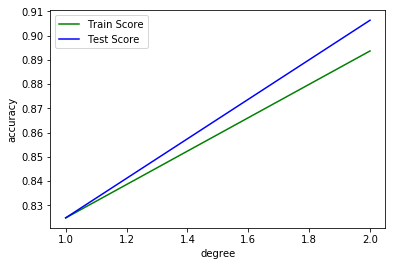

In [130]:
%matplotlib inline
 
x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()


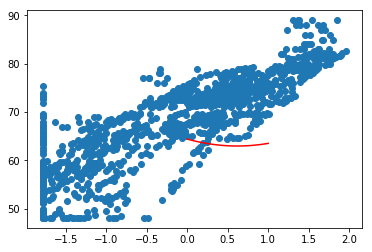

In [131]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)
 
x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)
 
X_train_1 = X_train[:,1].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')


### KNN Regressor

In [132]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

knn_range = list(range(1, 21))
param_grid = dict(n_neighbors=knn_range)
print(param_grid)

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score = True,scoring='r2')
 
grid_search.fit(X_train_scaled_reduced, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
Best parameters: {'n_neighbors': 3}
Highest CrossVal score: 0.92


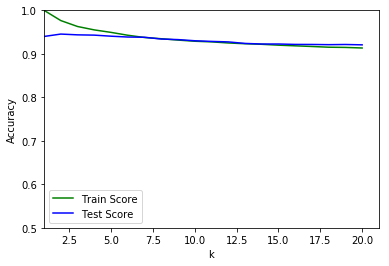

In [133]:
%matplotlib inline
train_array = []
test_array = []
 
for k in range(1,21):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_scaled_reduced, y_train)
    train_array.append(knn_reg.score(X_train_scaled_reduced, y_train))
    test_array.append(knn_reg.score(X_test_scaled_reduced, y_test))

x_axis = range(1,21)
plt.plot(x_axis, train_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_array, c = 'b', label = 'Test Score')
plt.axis([1, 21, 0.5, 1])
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


In [134]:
score = cross_val_score (KNeighborsRegressor(n_neighbors = 2), X_train_scaled_reduced, y_train, cv = 5, scoring = 'r2')
print( " Train r2 CrossVal score: {}".format ( score ))
print( "Train Avg CrossVal score: {:.2f}".format ( score.mean()))
 
score = cross_val_score (KNeighborsRegressor(n_neighbors = 2), X_test_scaled_reduced, y_test, cv = 5, scoring = 'r2')
print( " Test r2 CrossVal score: {}".format ( score))
print( "Test Avg CrossVal score: {:.2f}".format ( score.mean()))


 Train r2 CrossVal score: [0.91936103 0.92396418 0.90744888 0.90513424 0.91105645]
Train Avg CrossVal score: 0.91
 Test r2 CrossVal score: [0.93356923 0.91234613 0.89541833 0.89986772 0.89395914]
Test Avg CrossVal score: 0.91


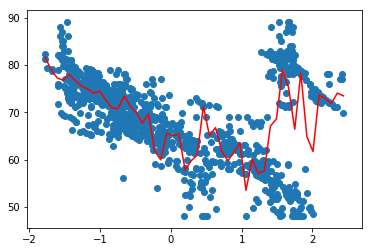

In [135]:
X_b = X_train_scaled_reduced[:,1].reshape(-1,1)
y_b = y_train[:]
 
knn_reg = KNeighborsRegressor(2)
knn_reg.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max()).reshape(50, 1)
y_predict = knn_reg.predict(X_new)
 
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)


### Ridge Regression

In [136]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled_reduced, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train_scaled_reduced, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test_scaled_reduced, y_test)))


Training set score: 0.82
Test set score: 0.82


In [137]:
ridge = Ridge()
 
#define a list of parameters
param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100] }
 
grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True)
grid_ridge.fit(X_train_scaled_reduced, y_train)
 
grid_ridge_train_score = grid_ridge.score(X_train_scaled_reduced, y_train)
grid_ridge_test_score = grid_ridge.score(X_test_scaled_reduced, y_test)
 
print('Training set score: ', grid_ridge_train_score)
print('Test set score: ', grid_ridge_test_score)
 
#find best parameters
print('best parameters:',grid_ridge.best_params_)
print('Best cross-validation score:', grid_ridge.best_score_)


Training set score:  0.8248051183385943
Test set score:  0.8246919437550889
best parameters: {'alpha': 10}
Best cross-validation score: 0.821120389668828


In [138]:
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
 
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_scaled_reduced,y_train)
    train_score_list.append(ridge.score(X_train_scaled_reduced,y_train))
    test_score_list.append(ridge.score(X_test_scaled_reduced, y_test))


Text(0.5,0,'$\\alpha$')

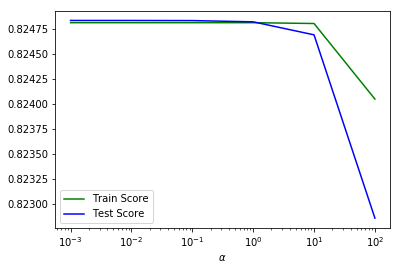

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')


In [140]:
print(train_score_list)
print(test_score_list)


[0.8248133972707244, 0.82481339726245, 0.8248133964350907, 0.824813313770816, 0.8248051183385943, 0.824050522006329]
[0.8248357798786362, 0.8248356562414033, 0.8248344192864628, 0.824821991527017, 0.8246919437550889, 0.8228617097865596]


In [141]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train_scaled_reduced,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train_scaled_reduced,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test_scaled_reduced, y_test)))


Train score: 0.8248
Test score: 0.8248


In [142]:
ridge.coef_

array([ 3.79285369, -2.61038988,  0.12550975, -0.21502887])

In [143]:
ridge.intercept_

69.26723300970875

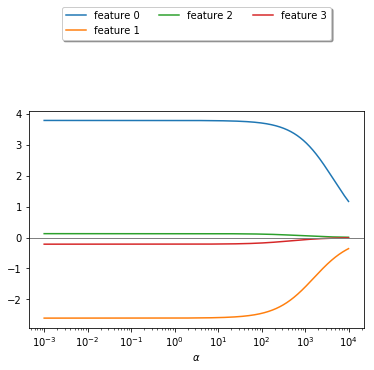

In [144]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_scaled_reduced,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,4):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### Lasso Regression

In [145]:
from sklearn.linear_model import Lasso
 
lasso = Lasso().fit(X_train_scaled_reduced, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train_scaled_reduced, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test_scaled_reduced, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))


Training set score: 0.81
Test set score: 0.81
Number of features used: 2


In [146]:
lasso = Lasso(max_iter=1000, tol = 1e-5)
 
#define a list of parameters
param_lasso = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10] }
grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True)
grid_lasso.fit(X_train_scaled_reduced, y_train)
 
grid_lasso_train_score = grid_lasso.score(X_train_scaled_reduced, y_train)
grid_lasso_test_score = grid_lasso.score(X_test_scaled_reduced, y_test)
 
print('Training set score: ', grid_lasso_train_score)
print('Test score: ', grid_lasso_test_score)
 
#find best parameters
print('Best parameters: ', grid_lasso.best_params_)
print('Best cross-validation score:', grid_lasso.best_score_)


Training set score:  0.8243026880048032
Test score:  0.8231348516529907
Best parameters:  {'alpha': 0.1}
Best cross-validation score: 0.8213328348644838


In [147]:
x_range = [0.0001,0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
 
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_scaled_reduced,y_train)
    train_score_list.append(lasso.score(X_train_scaled_reduced,y_train))
    test_score_list.append(lasso.score(X_test_scaled_reduced, y_test))


Text(0.5,0,'$\\alpha$')

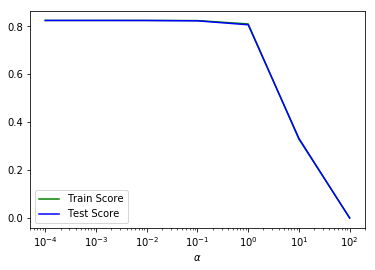

In [148]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')


In [149]:
lasso_grid = Lasso(0.0001, max_iter=100000)
scores = cross_val_score(lasso_grid, X_train_scaled_reduced, y_train, cv = 5, scoring = 'r2')
print( " Train r2 CrossVal score: {}".format ( score ))
print( "Train Avg CrossVal score: {:.2f}".format ( score.mean()))
 
scores = cross_val_score(lasso_grid, X_test_scaled_reduced, y_test, cv = 5, scoring = 'r2')
print( " Test r2 CrossVal score: {}".format ( score ))
print( "Test Avg CrossVal score: {:.2f}".format ( score.mean()))


 Train r2 CrossVal score: [0.93356923 0.91234613 0.89541833 0.89986772 0.89395914]
Train Avg CrossVal score: 0.91
 Test r2 CrossVal score: [0.93356923 0.91234613 0.89541833 0.89986772 0.89395914]
Test Avg CrossVal score: 0.91


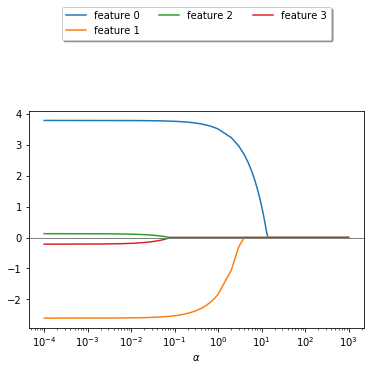

In [150]:
%matplotlib inline
 
x_range1 = np.linspace(0.0001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)
 
x_range = np.append(x_range1, x_range2)
coeff = []
 
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_scaled_reduced,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)
 
for i in range(0,4):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))
 
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()


### Support Vector Machine

In [151]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler


### Linear SVM

In [152]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#PCA
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components = 0.95)
X_train_scaled_reduced = pca.fit_transform(X_train)
X_test_scaled_reduced = pca.transform(X_test)
 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv = 2, return_train_score = True, scoring = 'r2')
grid_search.fit(X_train_scaled_reduced, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 1}
Highest CrossVal score: 0.82


In [153]:
lin_svm = LinearSVR( C = 10 )
 
lin_svm.fit(X_train_scaled_reduced, y_train)
print( lin_svm.score (X_train_scaled_reduced, y_train ))
print( lin_svm.score (X_test_scaled_reduced, y_test ))


0.8177749614601213
0.8129261423481517


Text(0.5,0,'C')

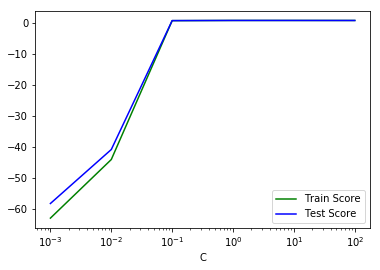

In [154]:
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
 
for c in x_range: 
    lin_svm = LinearSVR( C = c )
    lin_svm.fit(X_train_scaled_reduced, y_train )
    train_score_list.append( lin_svm.score( X_train_scaled_reduced,y_train ))
    test_score_list.append( lin_svm.score( X_test_scaled_reduced, y_test ))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 4)
plt.xlabel('C')


In [155]:
score = cross_val_score(LinearSVR(C = 10), X_train_scaled_reduced, y_train,cv = 5, scoring = 'r2')
print(" Train CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))
 
score = cross_val_score(LinearSVR(C = 10), X_test_scaled_reduced, y_test, cv = 10, scoring = 'r2')
print("Test CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))


 Train CrossVal score: [0.82723773 0.82714277 0.82335891 0.81210287 0.77735408]
Avg CrossVal score: 0.81
Test CrossVal score: [0.71931847 0.83224468 0.78380803 0.81765405 0.79878337 0.86425623
 0.7029833  0.82007476 0.80298508 0.86355052]
Avg CrossVal score: 0.80


### Kernalized SVM-rbf(Radial Basis Function)

In [156]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVR
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, .1, 10, 100]}
 
grid_search = GridSearchCV(SVR( kernel = 'rbf'), param_grid, return_train_score = True, cv = 5, scoring = 'r2')
 
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#PCA
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components = 0.95)
X_train_scaled_reduced = pca.fit_transform(X_train)
X_test_scaled_reduced = pca.transform(X_test)

grid_search.fit(X_train_scaled_reduced, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))



Best Parameter: {'C': 100, 'gamma': 1}
Highest CrossVal score: 0.91


In [157]:
score = cross_val_score(SVR(C = 10, kernel = 'rbf', gamma = 10), X_train_scaled_reduced, y_train,cv = 5, scoring = 'r2')
print("Train CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))
 
score = cross_val_score(SVR(C =10, kernel = 'rbf', gamma = 10), X_test_scaled_reduced, y_test, cv = 5, scoring = 'r2')
print("Test CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))


Train CrossVal score: [0.88648531 0.89495997 0.88870957 0.8857789  0.900065  ]
Avg CrossVal score: 0.89
Test CrossVal score: [0.87281078 0.83368751 0.85486393 0.81449968 0.8052831 ]
Avg CrossVal score: 0.84


### Kernalized SVM-poly

In [158]:
param_grid = {'degree': [1,2,3,4,5],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
grid_search = GridSearchCV(SVR(kernel='poly', gamma = 'auto'), param_grid, cv=10, return_train_score=True)
 
grid_search.fit(X_train_scaled_reduced, y_train)
 
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 100, 'degree': 4}
Best cross-validation score: 0.87


In [159]:
svr_poly_grid = SVR(kernel='poly',degree = 4, C=100, gamma = 'auto')
 
scores = cross_val_score(svr_poly_grid, X_train_scaled_reduced, y_train, cv = 10, scoring = 'r2')
print(" Train Cross-validation scores: {}".format(scores))
 
print("Average cross-validation score: {:.2f}".format(scores.mean()))
 
scores = cross_val_score(svr_poly_grid, X_test_scaled_reduced, y_test, cv = 10, scoring = 'r2')
print(" Test Cross-validation scores: {}".format(scores))
 
print("Average cross-validation score: {:.2f}".format(scores.mean()))


 Train Cross-validation scores: [0.87518487 0.89186779 0.88168954 0.83004843 0.87673672 0.86949292
 0.89937619 0.87292154 0.87403761 0.87157643]
Average cross-validation score: 0.87
 Test Cross-validation scores: [0.89163934 0.87949373 0.85304248 0.89182686 0.84187953 0.88541912
 0.89435454 0.87960844 0.83541443 0.86834968]
Average cross-validation score: 0.87


### Kernalized SVM-Linear

In [160]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=10, return_train_score=True)
 
grid_search.fit(X_train_scaled_reduced, y_train)
 
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 0.1, 'gamma': 0.001}
Best cross-validation score: 0.81


In [161]:
svr_linear_grid = SVR(kernel='linear', gamma = 0.001 , C =1)
 
scores = cross_val_score(svr_linear_grid, X_train_scaled_reduced, y_train, cv = 10, scoring = 'r2')
print(" Train Cross-validation scores: {}".format(scores))
 
print("Average cross-validation score: {:.2f}".format(scores.mean()))
 
scores = cross_val_score(svr_linear_grid, X_test_scaled_reduced, y_test, cv = 10, scoring = 'r2')
print(" Test Cross-validation scores: {}".format(scores))
 
print("Average cross-validation score: {:.2f}".format(scores.mean()))


 Train Cross-validation scores: [0.81950827 0.83690406 0.85862474 0.79264953 0.84513447 0.79508907
 0.8244485  0.79722775 0.80858072 0.74551806]
Average cross-validation score: 0.81
 Test Cross-validation scores: [0.70759749 0.83425521 0.78482592 0.82109452 0.79838472 0.8634807
 0.68568826 0.82219815 0.80314784 0.86386284]
Average cross-validation score: 0.80


## Table of models without PCA

In [163]:
import pandas as pd
Regression_without_pca_df = pd.read_excel('Regression_without_PCA.xlsx')


In [164]:
Regression_without_pca_df.index=Regression_without_pca_df['Model']

In [165]:
Regression_without_pca_df

Model  \
Model                                                                                  
Linear Regression                                                  Linear Regression   
Polynomial Regression                                          Polynomial Regression   
KNN Regressor                                                          KNN Regressor   
Ridge Regression                                                    Ridge Regression   
Lasso Regression                                                    Lasso Regression   
Linear SVM                                                                Linear SVM   
Kernalized SVM-rbf(Radial Basis Function)  Kernalized SVM-rbf(Radial Basis Function)   
Kernalized SVM-poly                                              Kernalized SVM-poly   
Kernalized SVM-Linear                                          Kernalized SVM-Linear   

                                           Train Score  Test Score  \
Model                                                                
Linear Regression                             0.851002    0.865343   
Polynomial Regression                         0.911268    0.922573   
KNN Regressor                                 0.910000    0.860000   
Ridge Regression                              0.851000    0.865300   
Lasso Regression                              0.851002    0.865339   
Linear SVM                                    0.849331    0.861292   
Kernalized SVM-rbf(Radial Basis Function)     0.910000    0.810000   
Kernalized SVM-poly                           0.880000    0.900000   
Kernalized SVM-Linear                         0.850000    0.860000   

                                           Cross-validation Score  \
Model                                                               
Linear Regression                                        0.850000   
Polynomial Regression                                    0.915000   
KNN Regressor                                            0.885000   
Ridge Regression                                         0.850363   
Lasso Regression                                         0.850363   
Linear SVM                                               0.850000   
Kernalized SVM-rbf(Radial Basis Function)                0.860000   
Kernalized SVM-poly                                      0.880000   
Kernalized SVM-Linear                                    0.850000   

                                                         Best Parameters  
Model                                                                     
Linear Regression                                                    NaN  
Polynomial Regression                      polynomialfeatures__degree: 2  
KNN Regressor                                             n_neighbors: 2  
Ridge Regression                                            alpha: 0.001  
Lasso Regression                                           alpha: 0.0001  
Linear SVM                                                         C: 10  
Kernalized SVM-rbf(Radial Basis Function)               C: 100, gamma: 1  
Kernalized SVM-poly                                    C: 100, degree: 4  
Kernalized SVM-Linear                                 C: 1, gamma: 0.001

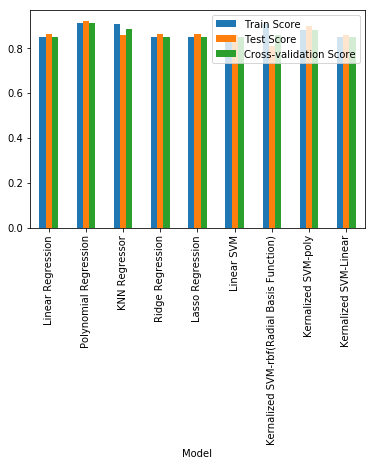

In [166]:
Regression_without_pca_df[['Train Score','Test Score','Cross-validation Score']].plot(kind='bar')

## Table of models with PCA

In [167]:
Regression_with_pca_df = pd.read_excel('Regression_with_PCA.xlsx')

In [168]:
Regression_with_pca_df.index=Regression_with_pca_df['Model']

In [169]:
Regression_with_pca_df 

Model  \
Model                                                                                  
Linear Regression                                                  Linear Regression   
Polynomial Regression                                          Polynomial Regression   
KNN Regressor                                                          KNN Regressor   
Ridge Regression                                                    Ridge Regression   
Lasso Regression                                                    Lasso Regression   
Linear SVM                                                                Linear SVM   
Kernalized SVM-rbf(Radial Basis Function)  Kernalized SVM-rbf(Radial Basis Function)   
Kernalized SVM-poly                                              Kernalized SVM-poly   
Kernalized SVM-Linear                                          Kernalized SVM-Linear   

                                           Train Score  Test Score  \
Model                                                                
Linear Regression                             0.843822    0.866754   
Polynomial Regression                         0.905218    0.911687   
KNN Regressor                                 0.930000    0.910000   
Ridge Regression                              0.843822    0.866756   
Lasso Regression                              0.843822    0.866754   
Linear SVM                                    0.841346    0.866515   
Kernalized SVM-rbf(Radial Basis Function)     0.910000    0.850000   
Kernalized SVM-poly                           0.870000    0.890000   
Kernalized SVM-Linear                         0.840000    0.860000   

                                           Cross-validation Score  \
Model                                                               
Linear Regression                                        0.840000   
Polynomial Regression                                    0.901502   
KNN Regressor                                            0.930000   
Ridge Regression                                         0.843113   
Lasso Regression                                         0.910000   
Linear SVM                                               0.840000   
Kernalized SVM-rbf(Radial Basis Function)                0.930000   
Kernalized SVM-poly                                      0.880000   
Kernalized SVM-Linear                                    0.840000   

                                                         Best Parameters  
Model                                                                     
Linear Regression                                                    NaN  
Polynomial Regression                      polynomialfeatures__degree: 2  
KNN Regressor                                             n_neighbors: 3  
Ridge Regression                                                alpha: 1  
Lasso Regression                                          alpha: 0.00001  
Linear SVM                                                          C: 1  
Kernalized SVM-rbf(Radial Basis Function)               C: 100, gamma: 1  
Kernalized SVM-poly                                    C: 100, degree: 5  
Kernalized SVM-Linear                                 C: 1, gamma: 0.001

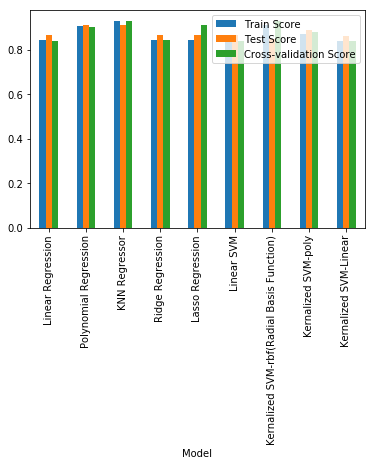

In [170]:
Regression_with_pca_df[['Train Score','Test Score','Cross-validation Score']].plot(kind='bar')

### Decision: Output of models like Ridge Regression, Lasso and Kernalized SVM-linear are much better without PCA. Models like KNN Regressor and Kernalized SVM-rbf show improvements with the application of PCA.

## Deep Learning

In [272]:
from keras.models import Sequential
from keras.layers import Dense

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 10)

### 1-Define Model

In [274]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

### 2-Compile Model

In [275]:
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

### 3-Fit Model

In [276]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
1236/1236 [==============================] - 0s 112us/step - loss: 108950803.2373 - mse: 108950816.0000
Epoch 2/100
1236/1236 [==============================] - 0s 47us/step - loss: 68633.9476 - mse: 68633.9453
Epoch 3/100
1236/1236 [==============================] - 0s 48us/step - loss: 5684.5755 - mse: 5684.5752
Epoch 4/100
1236/1236 [==============================] - 0s 68us/step - loss: 532.2279 - mse: 532.2279
Epoch 5/100
1236/1236 [==============================] - 0s 91us/step - loss: 111.5148 - mse: 111.5147
Epoch 6/100
1236/1236 [==============================] - 0s 66us/step - loss: 77.7034 - mse: 77.7034
Epoch 7/100
1236/1236 [==============================] - 0s 66us/step - loss: 74.7825 - mse: 74.7825
Epoch 8/100
1236/1236 [==============================] - 0s 81us/step - loss: 74.5400 - mse: 74.5400
Epoch 9/100
1236/1236 [==============================] - 0s 55us/step - loss: 74.5473 - mse: 74.5473
Epoch 10/100
1236/1236 [==============================] - 0s 5

1236/1236 [==============================] - 0s 74us/step - loss: 74.5105 - mse: 74.5105
Epoch 82/100
1236/1236 [==============================] - 0s 56us/step - loss: 74.5944 - mse: 74.5944
Epoch 83/100
1236/1236 [==============================] - 0s 52us/step - loss: 74.5614 - mse: 74.5614
Epoch 84/100
1236/1236 [==============================] - 0s 56us/step - loss: 74.5206 - mse: 74.5206
Epoch 85/100
1236/1236 [==============================] - 0s 74us/step - loss: 74.5701 - mse: 74.5701
Epoch 86/100
1236/1236 [==============================] - 0s 101us/step - loss: 74.5496 - mse: 74.5496
Epoch 87/100
1236/1236 [==============================] - 0s 77us/step - loss: 74.5243 - mse: 74.5243
Epoch 88/100
1236/1236 [==============================] - 0s 76us/step - loss: 74.5536 - mse: 74.5536
Epoch 89/100
1236/1236 [==============================] - 0s 70us/step - loss: 74.5802 - mse: 74.5802
Epoch 90/100
1236/1236 [==============================] - 0s 64us/step - loss: 74.5582 - mse: 

### 4-Evaluate model

In [277]:
model.evaluate(X_test, y_test)

413/413 [==============================] - 0s 124us/step


[77.90851190303775, 77.90850830078125]

In [278]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.00
Test score: -0.00
